In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True, font_scale=1.5)
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import itertools
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
soft=pd.read_csv('SoftDrink.csv')

In [3]:
display(soft.head())
display(soft.tail())

YearMonth  SoftDrinkProduction
0   1980-01                 1954
1   1980-02                 2302
2   1980-03                 3054
3   1980-04                 2414
4   1980-05                 2226

YearMonth  SoftDrinkProduction
182   1995-03                 4067
183   1995-04                 4022
184   1995-05                 3937
185   1995-06                 4365
186   1995-07                 4290

In [4]:
soft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   YearMonth            187 non-null    object
 1   SoftDrinkProduction  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [5]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [6]:
soft['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
soft.head()

YearMonth  SoftDrinkProduction Time_Stamp
0   1980-01                 1954 1980-01-31
1   1980-02                 2302 1980-02-29
2   1980-03                 3054 1980-03-31
3   1980-04                 2414 1980-04-30
4   1980-05                 2226 1980-05-31

In [7]:
soft = soft.set_index('Time_Stamp')
soft.drop(['YearMonth'], axis=1, inplace=True)
soft.head()

SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226

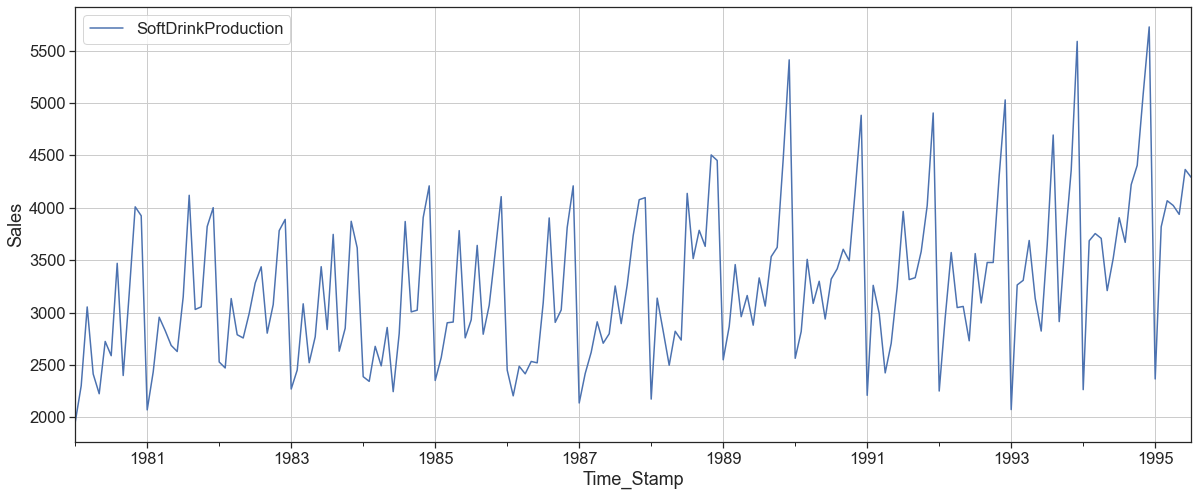

In [8]:
soft.plot(figsize=(20,8))
plt.ylabel("Sales")
plt.grid();

In [9]:
round(soft.describe(),3)

SoftDrinkProduction
count              187.000
mean              3262.610
std                728.357
min               1954.000
25%               2748.000
50%               3134.000
75%               3741.000
max               5725.000

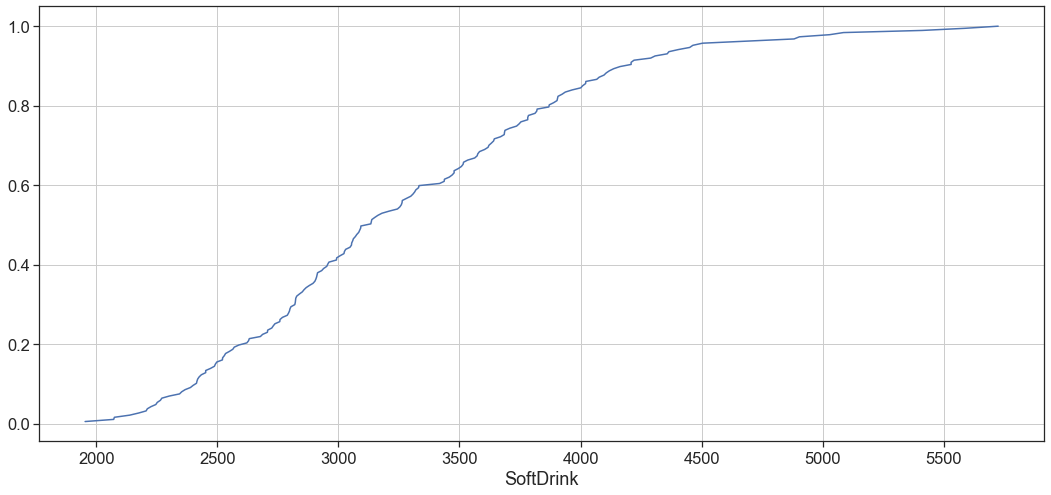

In [10]:
plt.figure(figsize=(18, 8))
cdf=ECDF(soft['SoftDrinkProduction'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('SoftDrink');

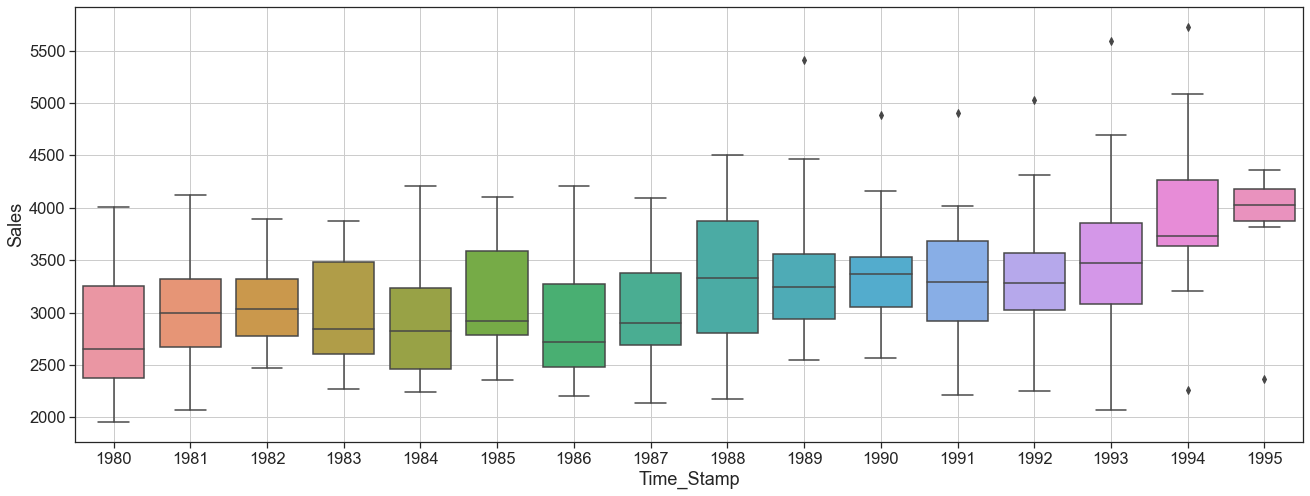

In [11]:
#Yearly Boxplot
fig,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = soft.index.year,y = soft.values[:,0],ax=ax)
plt.ylabel("Sales")
plt.grid();

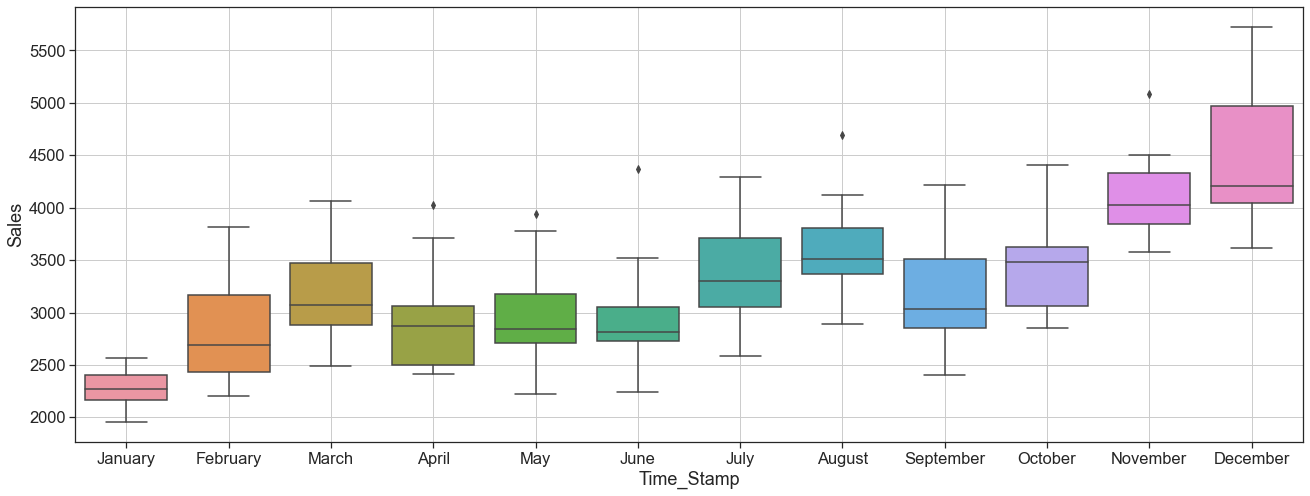

In [12]:
#Monthly Plot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = soft.index.month_name(),y = soft.values[:,0],ax=ax)
plt.ylabel("Sales")
plt.grid();

In [13]:
#Monthly Sales 
monthly_sales_across_years = pd.pivot_table(soft, values = 'SoftDrinkProduction', columns = soft.index.month_name(),
                                            index = soft.index.year)
monthly_sales_across_years

Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        2414.0  3470.0    3924.0    2302.0   1954.0  2589.0  2725.0   
1981        2828.0  4119.0    4001.0    2434.0   2072.0  3150.0  2629.0   
1982        2789.0  3437.0    3889.0    2472.0   2529.0  3282.0  2993.0   
1983        2522.0  3746.0    3618.0    2452.0   2271.0  2839.0  3438.0   
1984        2492.0  3869.0    4209.0    2344.0   2389.0  2800.0  2246.0   
1985        2910.0  3641.0    4106.0    2570.0   2353.0  2931.0  2759.0   
1986        2416.0  3903.0    4209.0    2206.0   2452.0  3093.0  2521.0   
1987        2912.0  2895.0    4097.0    2419.0   2138.0  3254.0  2798.0   
1988        2498.0  3515.0    4451.0    3138.0   2175.0  4137.0  2738.0   
1989        2961.0  3062.0    5411.0    2867.0   2550.0  3331.0  2880.0   
1990        3088.0  3418.0    4882.0    2820.0   2564.0  3320.0  2939.0   
1991        2425.0  3315.0    4904.0    3260.0   2211.0  3965.0  3244.0   
1992        3048.0  3092.0    5029.0    2952.0   2252.0  3563.0  2731.0   
1993        3688.0  4694.0    5587.0    3264.0   2075.0  3644.0  2824.0   
1994        3708.0  3670.0    5725.0    3685.0   2265.0  3905.0  3517.0   
1995        4022.0     NaN       NaN    3819.0   2367.0  4290.0  4365.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        3054.0  2226.0    4009.0   3180.0     2400.0  
1981        2956.0  2687.0    3821.0   3055.0     3030.0  
1982        3134.0  2758.0    3782.0   3076.0     2804.0  
1983        3084.0  2769.0    3871.0   2851.0     2632.0  
1984        2678.0  2858.0    3907.0   3023.0     3007.0  
1985        2903.0  3782.0    3576.0   3070.0     2794.0  
1986        2488.0  2534.0    3812.0   3025.0     2907.0  
1987        2622.0  2708.0    4077.0   3736.0     3263.0  
1988        2823.0  2822.0    4504.0   3632.0     3785.0  
1989        3458.0  3163.0    4464.0   3622.0     3534.0  
1990        3508.0  3299.0    4163.0   3495.0     3604.0  
1991        2992.0  2707.0    4021.0   3583.0     3333.0  
1992        3573.0  3059.0    4308.0   3478.0     3478.0  
1993        3308.0  3136.0    4358.0   3686.0     2914.0  
1994        3754.0  3210.0    5086.0   4404.0     4221.0  
1995        4067.0  3937.0       NaN      NaN        NaN

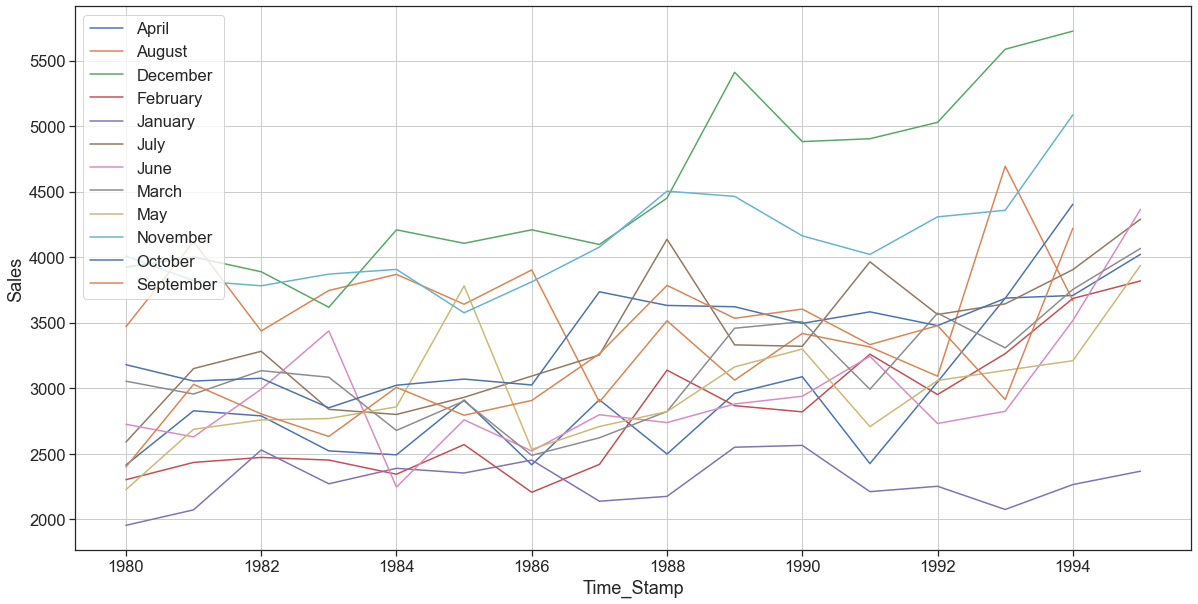

In [14]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.ylabel("Sales")
plt.legend(loc='best');

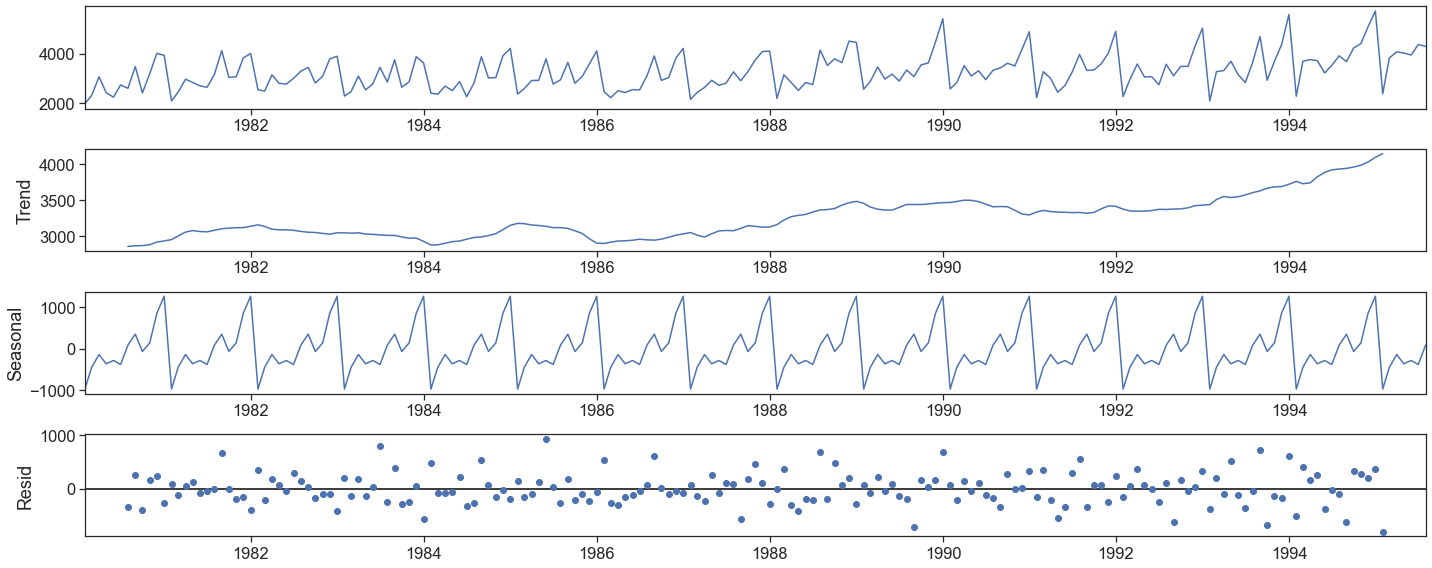

In [15]:
decomposition = seasonal_decompose(soft,model='additive')
rcParams['figure.figsize'] = 20,8
decomposition.plot();

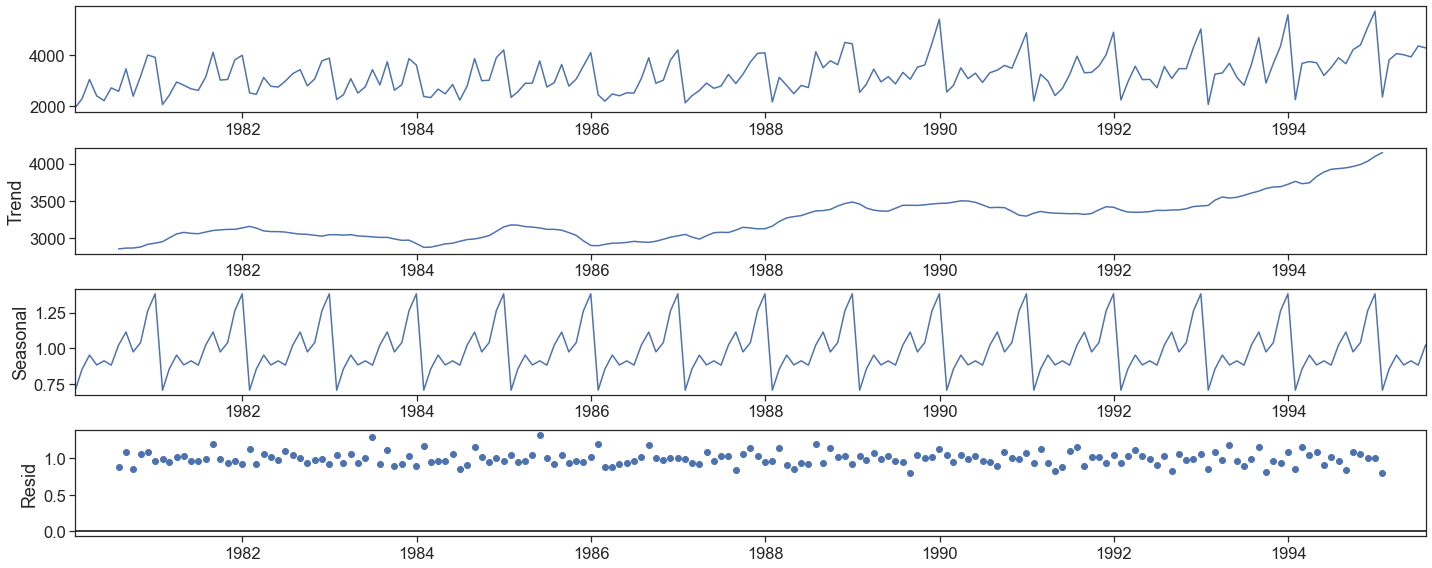

In [16]:
decomposition = seasonal_decompose(soft,model='multiplicative')
rcParams['figure.figsize'] = 20,8
decomposition.plot();

In [17]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [18]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2858.833333
1980-08-31    2869.250000
1980-09-30    2870.666667
1980-10-31    2883.833333
1980-11-30    2920.291667
1980-12-31    2935.500000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.709526
1980-02-29    0.856420
1980-03-31    0.953935
1980-04-30    0.885217
1980-05-31    0.913735
1980-06-30    0.883890
1980-07-31    1.023936
1980-08-31    1.114195
1980-09-30    0.975955
1980-10-31    1.040944
1980-11-30    1.261792
1980-12-31    1.380456
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.884444
1980-08-31    1.085425
1980-09-30    0.856641
1980-10-31    1.059326
1980-11-30    1.087983
1980-12-31    0.968332
Name: r

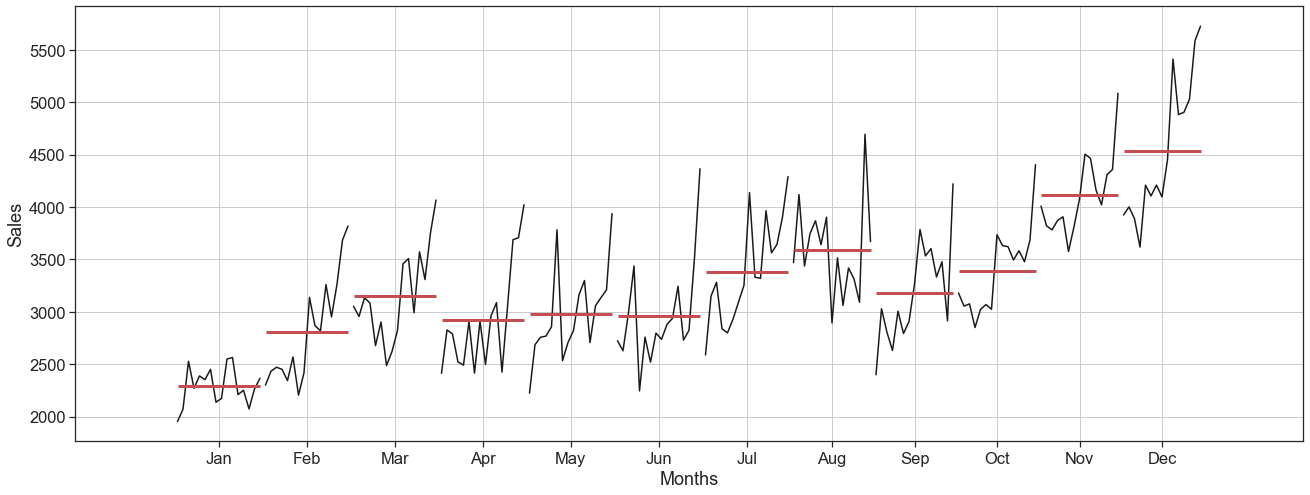

In [19]:
fig, ax = plt.subplots(figsize=(22,8))
month_plot(soft,ax=ax)
plt.ylabel("Sales")
plt.xlabel("Months")
plt.grid();

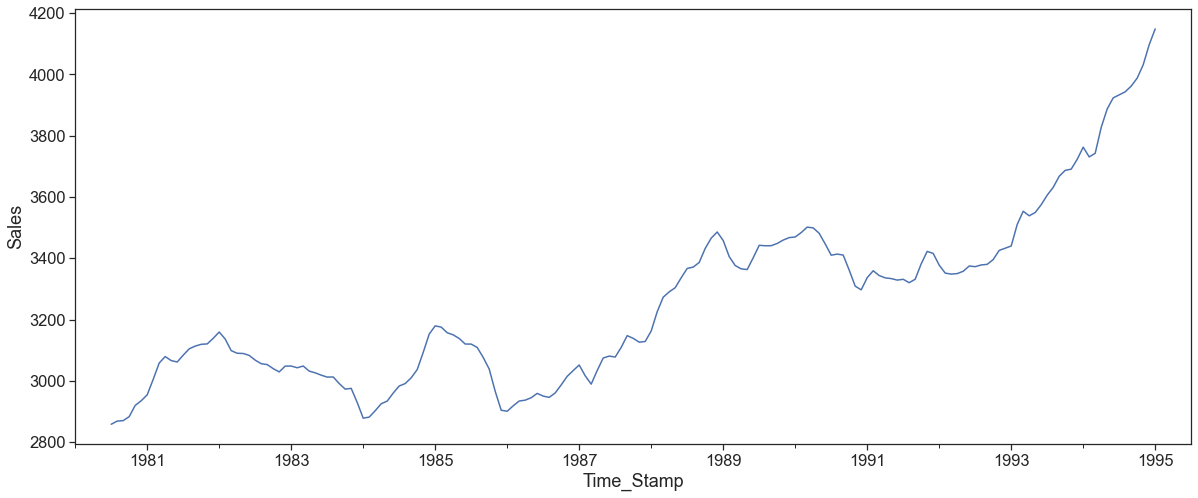

In [20]:
rcParams['figure.figsize'] = 20,8
plt.ylabel("Sales")
trend.plot();

In [21]:
#Split Data into training and test data
train=soft[soft.index.year < 1991]
test=soft[soft.index.year >= 1991]

In [22]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [23]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226

Last few rows of Training Data


SoftDrinkProduction
Time_Stamp                     
1990-08-31                 3418
1990-09-30                 3604
1990-10-31                 3495
1990-11-30                 4163
1990-12-31                 4882

First few rows of Test Data


SoftDrinkProduction
Time_Stamp                     
1991-01-31                 2211
1991-02-28                 3260
1991-03-31                 2992
1991-04-30                 2425
1991-05-31                 2707

Last few rows of Test Data


SoftDrinkProduction
Time_Stamp                     
1995-03-31                 4067
1995-04-30                 4022
1995-05-31                 3937
1995-06-30                 4365
1995-07-31                 4290

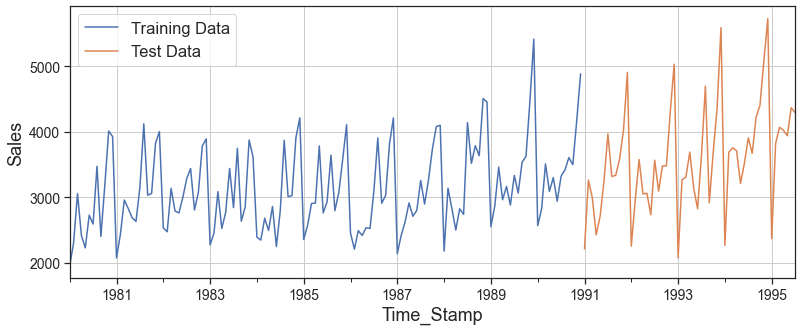

In [24]:
#Joint Plot of Train and Test Data
train['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
test['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.ylabel("Sales")
plt.show()

In [25]:
# Model 1: Linear Regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [26]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [27]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1980-01-31                 1954     1
1980-02-29                 2302     2
1980-03-31                 3054     3
1980-04-30                 2414     4
1980-05-31                 2226     5 

Last few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1990-08-31                 3418   128
1990-09-30                 3604   129
1990-10-31                 3495   130
1990-11-30                 4163   131
1990-12-31                 4882   132 

First few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                           
1991-01-31                 2211   133
1991-02-28                 3260   134
1991-03-31                 2992   135
1991-04-30                 2425   136
1991-05-31                 2707   137 

Last few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                      

In [28]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'].values)

LinearRegression()

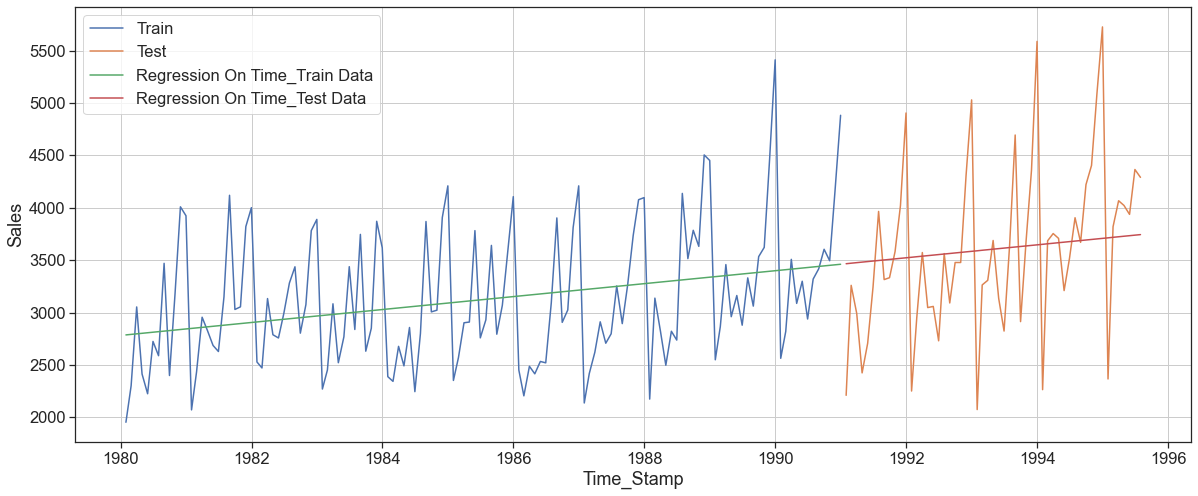

In [29]:
train_predictions_model1            = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1             = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime']  = test_predictions_model1

plt.figure(figsize=(20,8))
plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.ylabel("Sales")
plt.xlabel("Time_Stamp")
plt.grid();

In [30]:
#Model Evaluation
def MAPE(y, yhat):
    y, yhat = np.array(y),np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(y) * 100,2)
    except:
        print("Observed Values are empty")
        mape=np.nan
    return mape

In [31]:
import math
rmse = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1)
math.sqrt(rmse)

775.8078095118145

In [32]:
## Train Data - RMSE and MAPE
rmse_model1_train = metrics.mean_squared_error(train['SoftDrinkProduction'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['SoftDrinkProduction'],train_predictions_model1)
mape_model1_train

15.94

In [33]:
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['SoftDrinkProduction'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f" %(mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 775.808
For RegressionOnTime forecast on the Test Data,  MAPE is 16.120


In [34]:
results = pd.DataFrame({'Train RMSE': [rmse_model1_train],'Test RMSE': [rmse_model1_test],
                        'Train MAPE': [mape_model1_train],'Test MAPE': [mape_model1_test]},
                       index=['RegressionOnTime'])
results

Train RMSE  Test RMSE  Train MAPE  Test MAPE
RegressionOnTime  610.337953  775.80781       15.94      16.12

In [35]:
#Model 2: Naive Approach
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [36]:
NaiveModel_train['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
display(NaiveModel_train['naive'].head())
NaiveModel_test['naive'] = np.asarray(test['SoftDrinkProduction'])[len(np.asarray(test['SoftDrinkProduction']))-1]
display(NaiveModel_test['naive'].head())

Time_Stamp
1980-01-31    4882
1980-02-29    4882
1980-03-31    4882
1980-04-30    4882
1980-05-31    4882
Name: naive, dtype: int64

Time_Stamp
1991-01-31    4290
1991-02-28    4290
1991-03-31    4290
1991-04-30    4290
1991-05-31    4290
Name: naive, dtype: int64

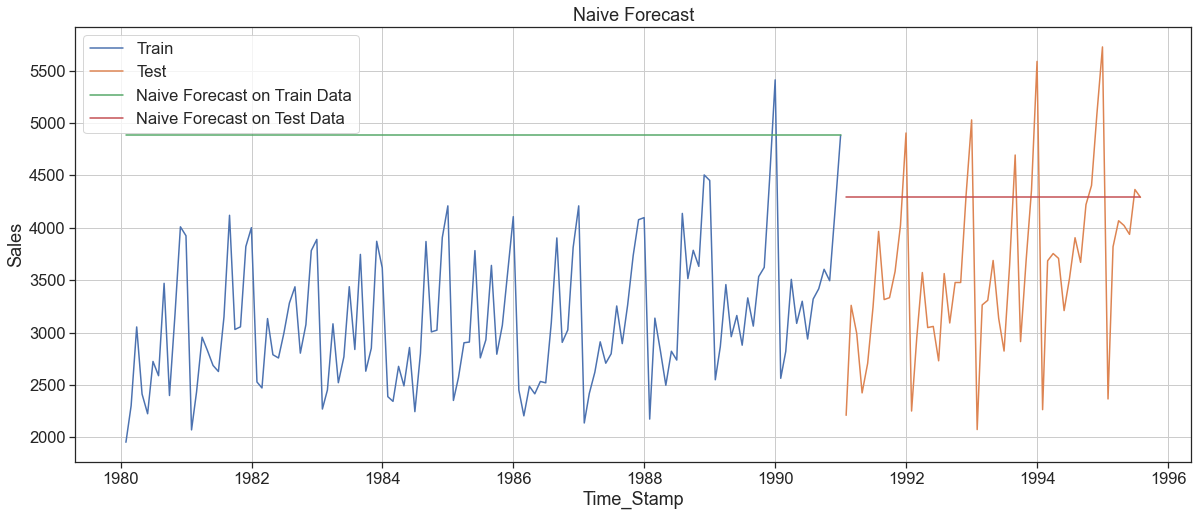

In [37]:
plt.figure(figsize=(20,8))
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.ylabel("Sales")
plt.xlabel("Time_Stamp")
plt.grid();

In [38]:
## Train Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['SoftDrinkProduction'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['SoftDrinkProduction'],NaiveModel_train['naive'])
rmse_model2_train, mape_model2_train

(1871.0699499419463, 56.52)

In [39]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['SoftDrinkProduction'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f" %(mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1065.201
For RegressionOnTime forecast on the Test Data,  MAPE is 24.960


In [40]:
resultsDf_2 = pd.DataFrame({'Train RMSE': [rmse_model2_train],'Test RMSE': [rmse_model2_test],
                            'Train MAPE': [mape_model2_train],'Test MAPE': [mape_model2_test]}
                           ,index=['NaiveModel'])

results = pd.concat([results, resultsDf_2])
results

Train RMSE    Test RMSE  Train MAPE  Test MAPE
RegressionOnTime   610.337953   775.807810       15.94      16.12
NaiveModel        1871.069950  1065.201355       56.52      24.96

In [41]:
#Simple Average
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [42]:
SimpleAverage_train['mean_forecast'] = train['SoftDrinkProduction'].mean()
display(SimpleAverage_train.head())
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
display(SimpleAverage_test.head())

SoftDrinkProduction  mean_forecast
Time_Stamp                                    
1980-01-31                 1954    3124.166667
1980-02-29                 2302    3124.166667
1980-03-31                 3054    3124.166667
1980-04-30                 2414    3124.166667
1980-05-31                 2226    3124.166667

SoftDrinkProduction  mean_forecast
Time_Stamp                                    
1991-01-31                 2211    3124.166667
1991-02-28                 3260    3124.166667
1991-03-31                 2992    3124.166667
1991-04-30                 2425    3124.166667
1991-05-31                 2707    3124.166667

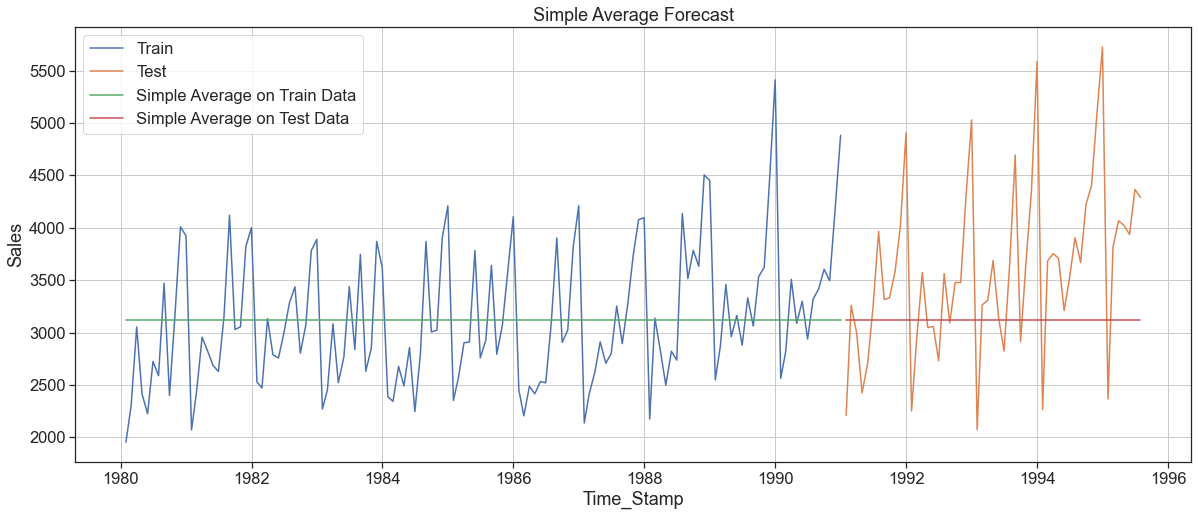

In [43]:
plt.figure(figsize=(20,8))
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.ylabel("Sales")
plt.xlabel("Time_Stamp")
plt.grid();

In [44]:
## Train and Test Data - RMSE  and MAPE

rmse_model3_train = metrics.mean_squared_error(train['SoftDrinkProduction'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['SoftDrinkProduction'],SimpleAverage_train['mean_forecast'])
rmse_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'])

In [45]:
resultsDf_3 = pd.DataFrame({'Train RMSE': [rmse_model3_train],'Test RMSE': [rmse_model3_test],
                            'Train MAPE': [mape_model3_train],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

results = pd.concat([results, resultsDf_3])
results

Train RMSE    Test RMSE  Train MAPE  Test MAPE
RegressionOnTime     610.337953   775.807810       15.94      16.12
NaiveModel          1871.069950  1065.201355       56.52      24.96
SimpleAverageModel   641.034110   934.353358       16.70      20.12

In [46]:
#Moving Average
MovingAverage = soft.copy()
MovingAverage.head()

SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226

In [47]:
MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()
MovingAverage.head(10)

SoftDrinkProduction  Trailing_2  Trailing_4   Trailing_6  \
Time_Stamp                                                             
1980-01-31                 1954         NaN         NaN          NaN   
1980-02-29                 2302      2128.0         NaN          NaN   
1980-03-31                 3054      2678.0         NaN          NaN   
1980-04-30                 2414      2734.0     2431.00          NaN   
1980-05-31                 2226      2320.0     2499.00          NaN   
1980-06-30                 2725      2475.5     2604.75  2445.833333   
1980-07-31                 2589      2657.0     2488.50  2551.666667   
1980-08-31                 3470      3029.5     2752.50  2746.333333   
1980-09-30                 2400      2935.0     2796.00  2637.333333   
1980-10-31                 3180      2790.0     2909.75  2765.000000   

             Trailing_9  
Time_Stamp               
1980-01-31          NaN  
1980-02-29          NaN  
1980-03-31          NaN  
1980-04-30          NaN  
1980-05-31          NaN  
1980-06-30          NaN  
1980-07-31          NaN  
1980-08-31          NaN  
1980-09-30  2570.444444  
1980-10-31  2706.666667

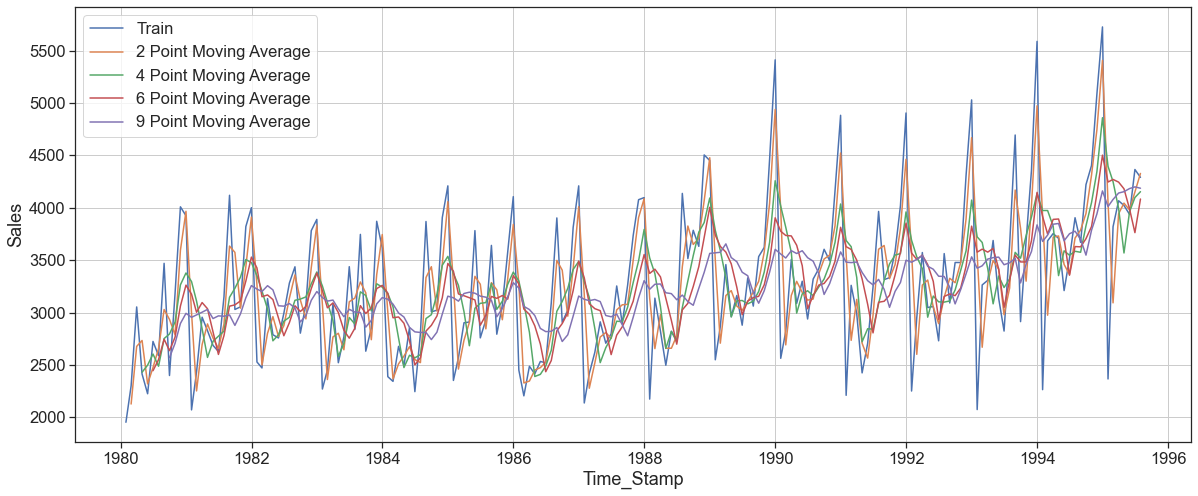

In [48]:
plt.figure(figsize=(20,8))
plt.plot(MovingAverage['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'], label='9 Point Moving Average')

plt.legend(loc = 'best')
plt.ylabel("Sales")
plt.xlabel("Time_Stamp")
plt.grid();

In [49]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

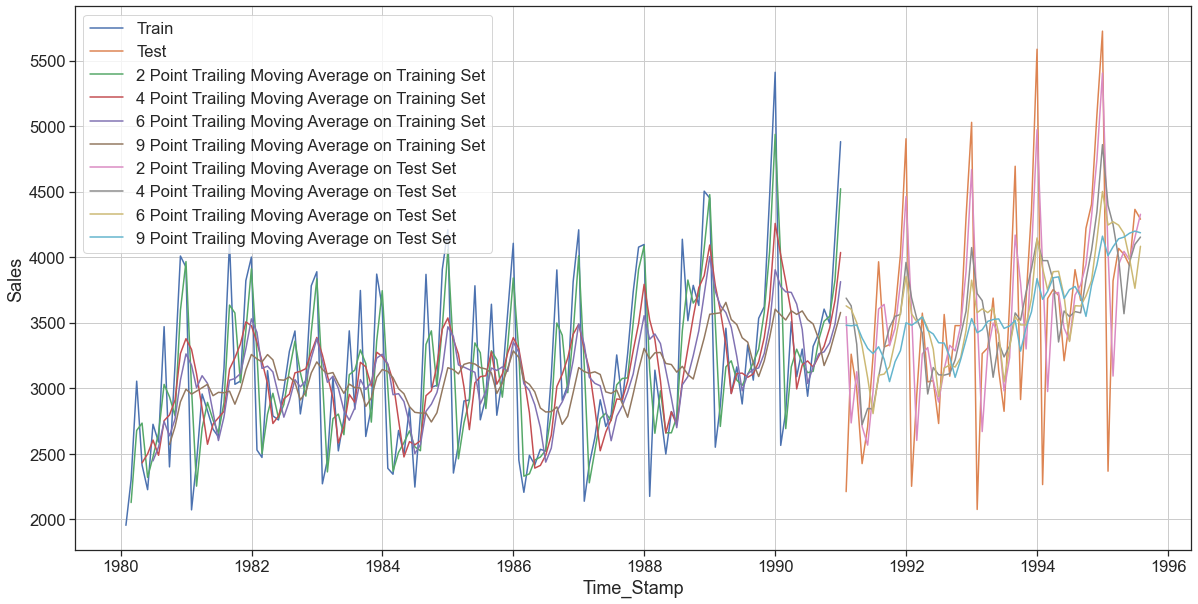

In [50]:
plt.figure(figsize=(20,10))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label = '2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label = '4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'], label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'], label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label = '2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label = '4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'], label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'], label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.ylabel("Sales")
plt.xlabel("Time_Stamp")
plt.grid();

In [51]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_2))
print("For 2 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA


rmse_model4_test_4 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_4))
print("For 4 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA


rmse_model4_test_6 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_6))
print("For 6 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA


rmse_model4_test_9 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f " %(rmse_model4_test_9))
print("For 9 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 556.725
For 2 point Moving Average Model forecast on the Testing Data,  MAPE is 10.670
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 687.182
For 4 point Moving Average Model forecast on the Testing Data,  MAPE is 13.710
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 710.514
For 6 point Moving Average Model forecast on the Testing Data,  MAPE is 15.010
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 735.890 
For 9 point Moving Average Model forecast on the Testing Data,  MAPE is 15.330


In [52]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9],
                            'Test MAPE': [mape_model4_test_2,mape_model4_test_4
                                          ,mape_model4_test_6,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results = pd.concat([results, resultsDf_4])
results

Train RMSE    Test RMSE  Train MAPE  Test MAPE
RegressionOnTime              610.337953   775.807810       15.94      16.12
NaiveModel                   1871.069950  1065.201355       56.52      24.96
SimpleAverageModel            641.034110   934.353358       16.70      20.12
2pointTrailingMovingAverage          NaN   556.725418         NaN      10.67
4pointTrailingMovingAverage          NaN   687.181726         NaN      13.71
6pointTrailingMovingAverage          NaN   710.513877         NaN      15.01
9pointTrailingMovingAverage          NaN   735.889827         NaN      15.33

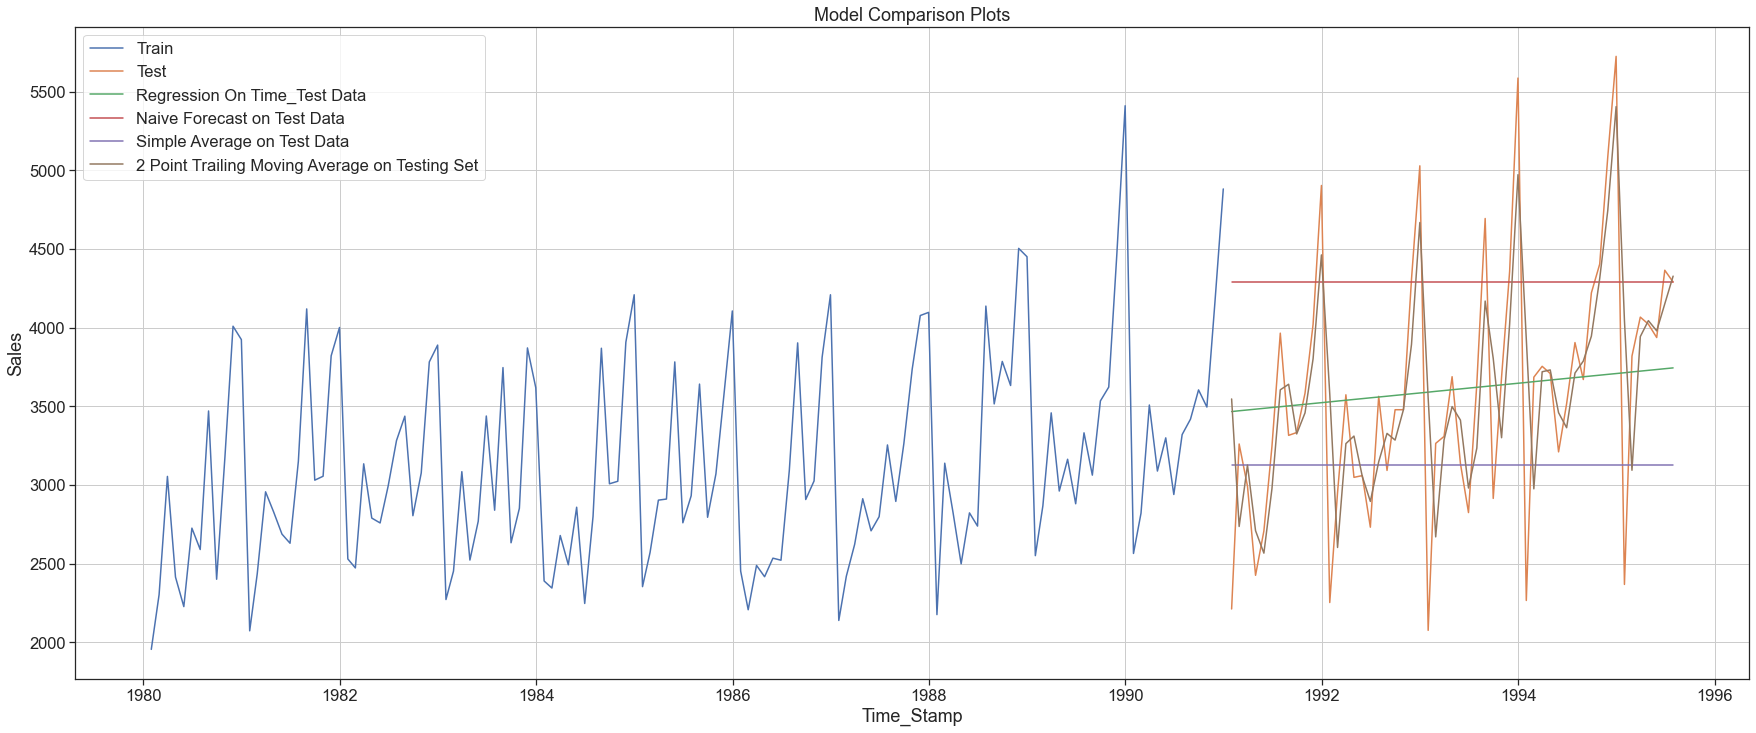

In [53]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Testing Set')

plt.legend(loc='best')
plt.ylabel("Sales")
plt.xlabel("Time_Stamp")
plt.title("Model Comparison Plots")
plt.grid();

In [54]:
#Simple Exponential Smoothing
SES_train = train.copy()
SES_test = test.copy()

In [55]:
model_SES = SimpleExpSmoothing(SES_train['SoftDrinkProduction'])

In [56]:
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.2162885602609007,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2297.422897653051,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [57]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

SoftDrinkProduction      predict
Time_Stamp                                  
1991-01-31                 2211  3853.781071
1991-02-28                 3260  3853.781071
1991-03-31                 2992  3853.781071
1991-04-30                 2425  3853.781071
1991-05-31                 2707  3853.781071

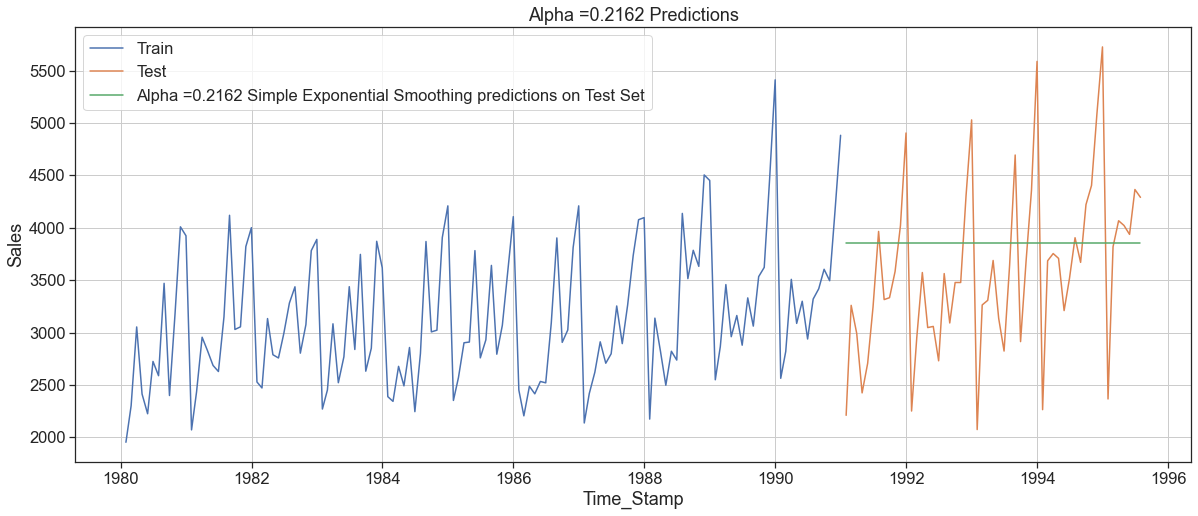

In [58]:
plt.figure(figsize=(20,8))
plt.plot(SES_train['SoftDrinkProduction'], label='Train')
plt.plot(SES_test['SoftDrinkProduction'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.2162 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.ylabel("Sales")
plt.xlabel("Time_Stamp")
plt.title('Alpha =0.2162 Predictions');

In [59]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['SoftDrinkProduction'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['SoftDrinkProduction'],SES_test['predict'])
print("For Alpha =0.2162 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))
print("For Alpha =0.2162 Simple Exponential Smoothing Model forecast on the Test Data, MAPE is %3.3f" %(mape_model5_test_1))

For Alpha =0.2162 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 847.635
For Alpha =0.2162 Simple Exponential Smoothing Model forecast on the Test Data, MAPE is 18.860


In [60]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]},
                           index=['Alpha=0.2162,SimpleExponentialSmoothing'])

results = pd.concat([results, resultsDf_5])
results['Test RMSE']

RegressionOnTime                            775.807810
NaiveModel                                 1065.201355
SimpleAverageModel                          934.353358
2pointTrailingMovingAverage                 556.725418
4pointTrailingMovingAverage                 687.181726
6pointTrailingMovingAverage                 710.513877
9pointTrailingMovingAverage                 735.889827
Alpha=0.2162,SimpleExponentialSmoothing     847.635259
Name: Test RMSE, dtype: float64

In [61]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['SoftDrinkProduction'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['SoftDrinkProduction'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['SoftDrinkProduction'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['SoftDrinkProduction'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE':mape_model5_train_i
                                      ,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i }, ignore_index=True)

In [62]:
resultsDf_6.sort_values(by=['Test RMSE'])

Alpha Values  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.1  648.758846       16.32   807.346865      17.30
1           0.2  645.186884       16.21   838.357158      18.55
2           0.3  650.458591       16.13   910.187416      20.65
3           0.4  656.803409       15.98  1005.179377      23.39
4           0.5  664.777265       16.02  1105.985227      26.08
5           0.6  674.988238       16.16  1203.565956      28.98
6           0.7  687.376817       16.33  1294.680933      31.58
7           0.8  701.579829       16.45  1378.198740      33.88
8           0.9  717.287681       16.77  1453.359494      35.96

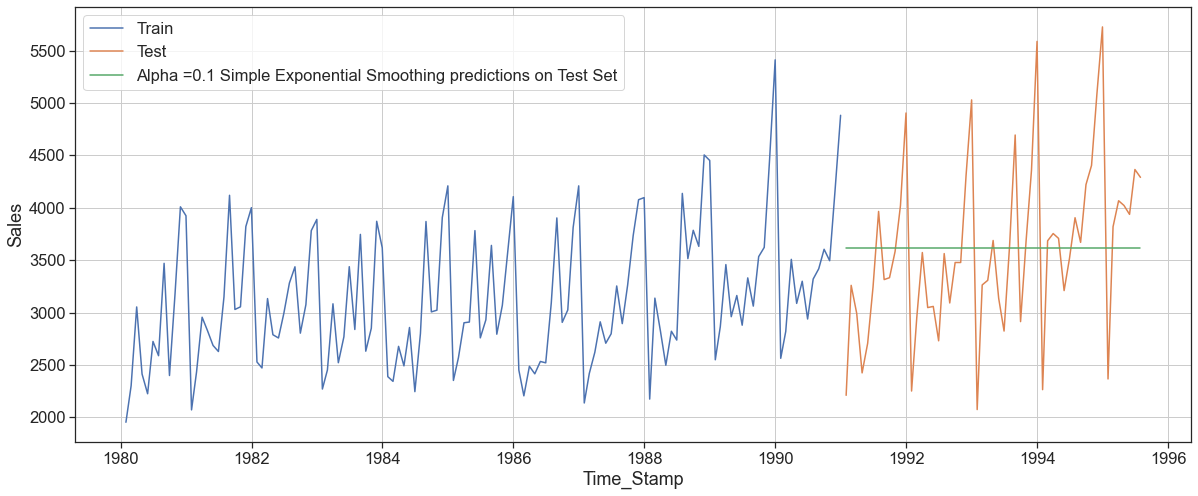

In [63]:
plt.figure(figsize=(20,8))
plt.plot(SES_train['SoftDrinkProduction'], label='Train')
plt.plot(SES_test['SoftDrinkProduction'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.ylabel("Sales")
plt.xlabel("Time_Stamp")
plt.grid();

In [64]:
resultsDf_6_1 = pd.DataFrame({'Train RMSE': [resultsDf_6['Train RMSE'][0]],
                              'Test RMSE': [resultsDf_6['Test RMSE'][0]],
                              'Train MAPE': [resultsDf_6['Train MAPE'][0]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

results = pd.concat([results, resultsDf_6_1])
results

Train RMSE    Test RMSE  Train MAPE  \
RegressionOnTime                          610.337953   775.807810       15.94   
NaiveModel                               1871.069950  1065.201355       56.52   
SimpleAverageModel                        641.034110   934.353358       16.70   
2pointTrailingMovingAverage                      NaN   556.725418         NaN   
4pointTrailingMovingAverage                      NaN   687.181726         NaN   
6pointTrailingMovingAverage                      NaN   710.513877         NaN   
9pointTrailingMovingAverage                      NaN   735.889827         NaN   
Alpha=0.2162,SimpleExponentialSmoothing          NaN   847.635259         NaN   
Alpha=0.1,SimpleExponentialSmoothing      648.758846   807.346865       16.32   

                                         Test MAPE  
RegressionOnTime                             16.12  
NaiveModel                                   24.96  
SimpleAverageModel                           20.12  
2pointTrailingMovingAverage                  10.67  
4pointTrailingMovingAverage                  13.71  
6pointTrailingMovingAverage                  15.01  
9pointTrailingMovingAverage                  15.33  
Alpha=0.2162,SimpleExponentialSmoothing      18.86  
Alpha=0.1,SimpleExponentialSmoothing         17.30

In [65]:
#Double Exponential Smoothing
DES_train = train.copy()
DES_test = test.copy()

In [66]:
model_DES = Holt(DES_train['SoftDrinkProduction'])

In [67]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 0.39406527825770943,
 'smoothing_trend': 0.06770527714060372,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2225.8990257638184,
 'initial_trend': 63.12786498516429,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [68]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

SoftDrinkProduction      predict
Time_Stamp                                  
1991-01-31                 2211  4252.678190
1991-02-28                 3260  4306.875038
1991-03-31                 2992  4361.071886
1991-04-30                 2425  4415.268733
1991-05-31                 2707  4469.465581

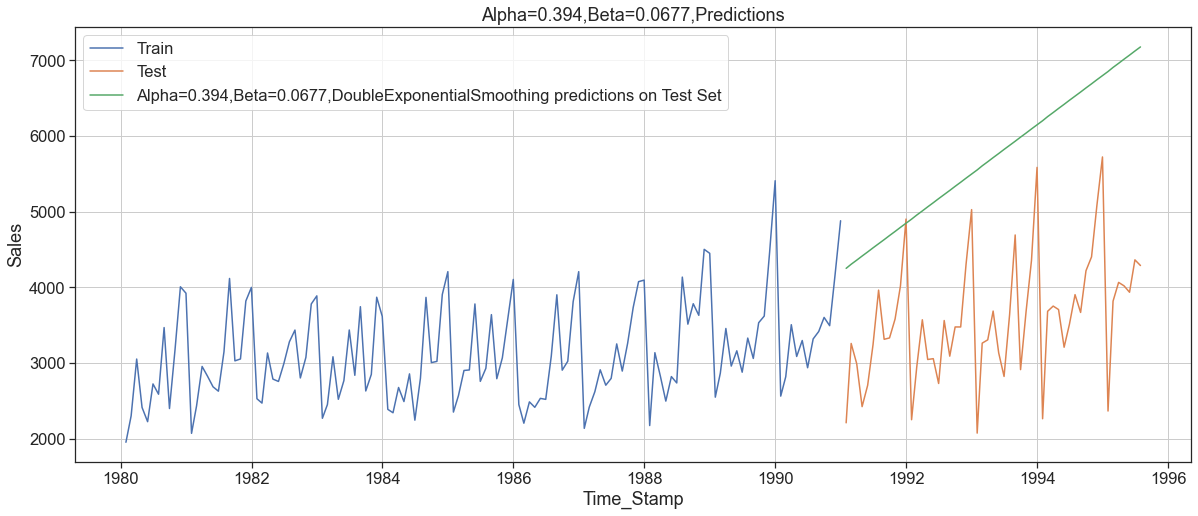

In [69]:
plt.figure(figsize=(20,8))
plt.plot(DES_train['SoftDrinkProduction'], label='Train')
plt.plot(DES_test['SoftDrinkProduction'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.394,Beta=0.0677,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.ylabel("Sales")
plt.xlabel("Time_Stamp")
plt.title('Alpha=0.394,Beta=0.0677,Predictions');

In [70]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': [],'Train MAPE':[],
                            'Test MAPE':[]})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['SoftDrinkProduction'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['SoftDrinkProduction'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['SoftDrinkProduction'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['SoftDrinkProduction'],DES_test['predict',i,j])
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,
                                          'Train RMSE':rmse_model6_train,
                                          'Test RMSE':rmse_model6_test,
                                          'Train MAPE':mape_model6_train,
                                          'Test MAPE':mape_model6_test}, ignore_index=True)

In [71]:
display(resultsDf_7.sort_values(by=['Train RMSE']).head())
display(resultsDf_7.sort_values(by=['Test RMSE']).head())

Alpha Values  Beta Values  Train RMSE    Test RMSE  Train MAPE  Test MAPE
30           0.4          0.1  695.050853  3050.149683       16.82      78.45
20           0.3          0.1  698.165128  2306.003981       17.35      58.65
40           0.5          0.1  698.518301  3681.115193       16.61      95.12
11           0.2          0.2  704.975902  2649.594505       18.13      66.54
50           0.6          0.1  706.852855  4204.019753       16.70     108.84

Alpha Values  Beta Values  Train RMSE    Test RMSE  Train MAPE  Test MAPE
0            0.1          0.1  893.178173   982.938364       22.18      23.65
1            0.1          0.2  765.760815  1082.798709       19.59      26.28
10           0.2          0.1  721.404860  1524.533365       18.44      37.81
2            0.1          0.3  731.718292  1706.868339       18.92      41.65
20           0.3          0.1  698.165128  2306.003981       17.35      58.65

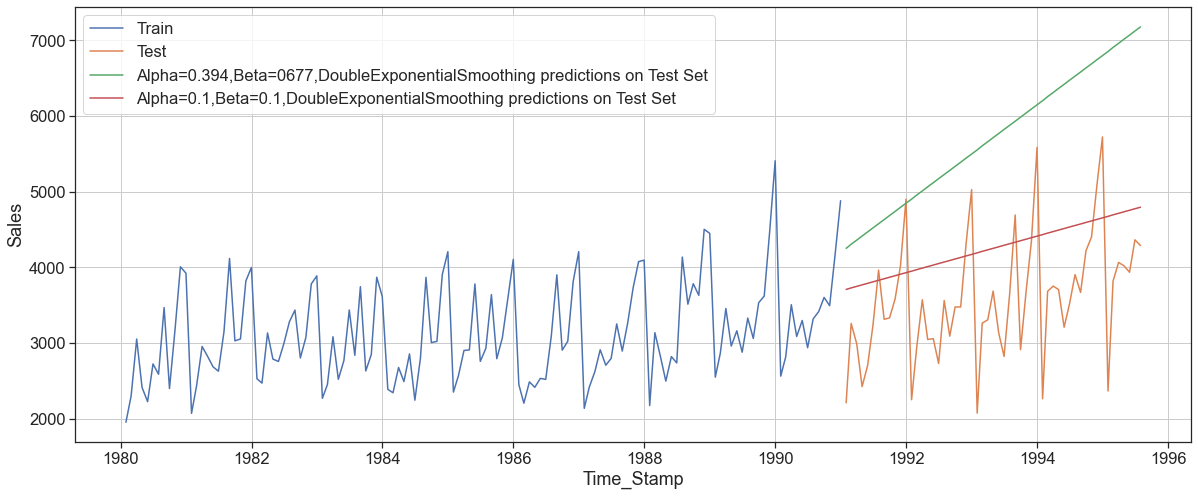

In [72]:
plt.figure(figsize=(20,8))
plt.plot(DES_train['SoftDrinkProduction'], label='Train')
plt.plot(DES_test['SoftDrinkProduction'], label='Test')
plt.plot(DES_test['predict'], label='Alpha=0.394,Beta=0677,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.grid();

In [73]:
resultsDf_7_1 = pd.DataFrame({'Train RMSE': [resultsDf_7['Train RMSE'][0]],
                              'Test RMSE': [resultsDf_7['Test RMSE'][0]],
                              'Train MAPE': [resultsDf_7['Train MAPE'][0]],
                              'Test MAPE': [resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

results = pd.concat([results, resultsDf_7_1])
results

Train RMSE    Test RMSE  \
RegressionOnTime                                610.337953   775.807810   
NaiveModel                                     1871.069950  1065.201355   
SimpleAverageModel                              641.034110   934.353358   
2pointTrailingMovingAverage                            NaN   556.725418   
4pointTrailingMovingAverage                            NaN   687.181726   
6pointTrailingMovingAverage                            NaN   710.513877   
9pointTrailingMovingAverage                            NaN   735.889827   
Alpha=0.2162,SimpleExponentialSmoothing                NaN   847.635259   
Alpha=0.1,SimpleExponentialSmoothing            648.758846   807.346865   
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing   893.178173   982.938364   

                                               Train MAPE  Test MAPE  
RegressionOnTime                                    15.94      16.12  
NaiveModel                                          56.52      24.96  
SimpleAverageModel                                  16.70      20.12  
2pointTrailingMovingAverage                           NaN      10.67  
4pointTrailingMovingAverage                           NaN      13.71  
6pointTrailingMovingAverage                           NaN      15.01  
9pointTrailingMovingAverage                           NaN      15.33  
Alpha=0.2162,SimpleExponentialSmoothing               NaN      18.86  
Alpha=0.1,SimpleExponentialSmoothing                16.32      17.30  
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       22.18      23.65

In [74]:
#Triple Exponential Smoothing (Holt - Winter's Model)
TES_train = train.copy()
TES_test = test.copy()

In [75]:
model_TES = ExponentialSmoothing(TES_train['SoftDrinkProduction'],trend='additive',seasonal='multiplicative',freq='M')

In [76]:
model_TES_autofit = model_TES.fit()
model_TES_autofit.params

{'smoothing_level': 0.11107205323498645,
 'smoothing_trend': 0.04936537982835477,
 'smoothing_seasonal': 0.230462952024982,
 'damping_trend': nan,
 'initial_level': 2803.208688691837,
 'initial_trend': 15.6758852288812,
 'initial_seasons': array([0.79234556, 0.86540969, 1.04081794, 0.93154862, 0.95321163,
        0.97687575, 1.04072294, 1.27211679, 1.00498107, 1.07628246,
        1.34040527, 1.39140597]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
display(TES_test.head())
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
display(TES_test.head())

SoftDrinkProduction
Time_Stamp                     
1991-01-31                 2211
1991-02-28                 3260
1991-03-31                 2992
1991-04-30                 2425
1991-05-31                 2707

SoftDrinkProduction  auto_predict
Time_Stamp                                   
1991-01-31                 2211   2565.454769
1991-02-28                 3260   2890.069194
1991-03-31                 2992   3296.776543
1991-04-30                 2425   3008.139428
1991-05-31                 2707   3214.454451

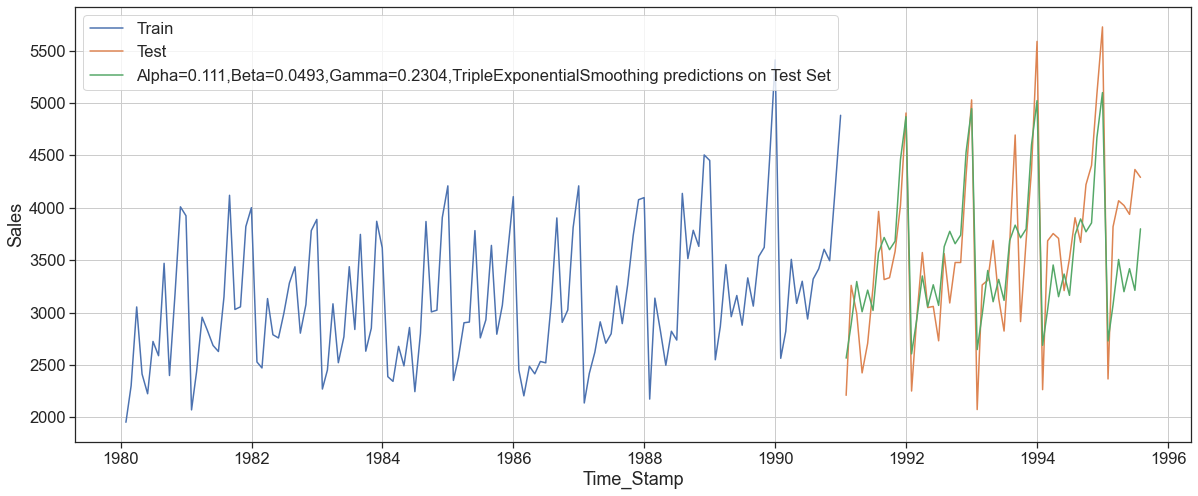

In [78]:
plt.figure(figsize=(20,8))
plt.plot(TES_train['SoftDrinkProduction'], label='Train')
plt.plot(TES_test['SoftDrinkProduction'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.0493,Gamma=0.2304,TripleExponentialSmoothing predictions on Test Set')
plt.ylabel("Sales")
plt.xlabel("Time_Stamp")
plt.legend(loc='best')
plt.grid();

In [79]:
rmse_model8_train_1=metrics.mean_squared_error(TES_train['SoftDrinkProduction'],TES_train['auto_predict'],squared=False)
mape_model8_train_1=MAPE(TES_train['SoftDrinkProduction'],TES_train['auto_predict'])
rmse_model8_test_1=metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['auto_predict'],squared=False)
mape_model8_test_1=MAPE(TES_test['SoftDrinkProduction'],TES_test['auto_predict'])
print("For Alpha=0.111,Beta=0.0493,Gamma=0.2304, Triple Exponential Smoothing Model forecast on the Train Data,  RMSE is %3.3f" %(rmse_model8_train_1))
print("For Alpha=0.111,Beta=0.0493,Gamma=0.2304, Triple Exponential Smoothing Model forecast on the Train Data,  MAPE is %3.3f" %(mape_model8_train_1))
print("For Alpha=0.111,Beta=0.0493,Gamma=0.2304, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model8_test_1))
print("For Alpha=0.111,Beta=0.0493,Gamma=0.2304, Triple Exponential Smoothing Model forecast on the Test Data,  MAPE is %3.3f" %(mape_model8_test_1))

For Alpha=0.111,Beta=0.0493,Gamma=0.2304, Triple Exponential Smoothing Model forecast on the Train Data,  RMSE is 313.876
For Alpha=0.111,Beta=0.0493,Gamma=0.2304, Triple Exponential Smoothing Model forecast on the Train Data,  MAPE is 7.530
For Alpha=0.111,Beta=0.0493,Gamma=0.2304, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 447.543
For Alpha=0.111,Beta=0.0493,Gamma=0.2304, Triple Exponential Smoothing Model forecast on the Test Data,  MAPE is 10.500


In [80]:
resultsDf_8_1 = pd.DataFrame({'Train RMSE': [rmse_model8_train_1],
                              'Test RMSE': [rmse_model8_test_1],
                              'Train MAPE': [mape_model8_train_1],
                              'Test MAPE': [mape_model8_test_1]}
                           ,index=['Alpha=0.111,Beta=0.0493,Gamma=0.2304,TripleExponentialSmoothing'])

results = pd.concat([results, resultsDf_8_1])
results

Train RMSE    Test RMSE  \
RegressionOnTime                                     610.337953   775.807810   
NaiveModel                                          1871.069950  1065.201355   
SimpleAverageModel                                   641.034110   934.353358   
2pointTrailingMovingAverage                                 NaN   556.725418   
4pointTrailingMovingAverage                                 NaN   687.181726   
6pointTrailingMovingAverage                                 NaN   710.513877   
9pointTrailingMovingAverage                                 NaN   735.889827   
Alpha=0.2162,SimpleExponentialSmoothing                     NaN   847.635259   
Alpha=0.1,SimpleExponentialSmoothing                 648.758846   807.346865   
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing        893.178173   982.938364   
Alpha=0.111,Beta=0.0493,Gamma=0.2304,TripleExpo...   313.875824   447.542908   

                                                    Train MAPE  Test MAPE  
RegressionOnTime                                         15.94      16.12  
NaiveModel                                               56.52      24.96  
SimpleAverageModel                                       16.70      20.12  
2pointTrailingMovingAverage                                NaN      10.67  
4pointTrailingMovingAverage                                NaN      13.71  
6pointTrailingMovingAverage                                NaN      15.01  
9pointTrailingMovingAverage                                NaN      15.33  
Alpha=0.2162,SimpleExponentialSmoothing                    NaN      18.86  
Alpha=0.1,SimpleExponentialSmoothing                     16.32      17.30  
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing            22.18      23.65  
Alpha=0.111,Beta=0.0493,Gamma=0.2304,TripleExpo...        7.53      10.50

In [81]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],
                              'Test RMSE': [], 'Train MAPE':[], 'Test MAPE':[]})

In [82]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,
                                                  optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['SoftDrinkProduction'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['SoftDrinkProduction'],TES_train['predict',i,j,k])
            rmse_model8_test = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['SoftDrinkProduction'],TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test,
                                                  'Train MAPE':mape_model8_train,
                                                  'Test MAPE':mape_model8_test}
                                                 , ignore_index=True)

In [83]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE  \
0             0.1          0.1           0.1     323.194243  5.260873e+02   
1             0.1          0.1           0.2     318.361220  5.365862e+02   
2             0.1          0.1           0.3     319.172231  5.493734e+02   
3             0.1          0.1           0.4     323.577753  5.572302e+02   
4             0.1          0.1           0.5     330.616754  5.599671e+02   
..            ...          ...           ...            ...           ...   
724           0.9          0.9           0.5   69264.159167  1.062371e+06   
725           0.9          0.9           0.6   15264.005282  1.053933e+05   
726           0.9          0.9           0.7  558817.725566  1.635035e+04   
727           0.9          0.9           0.8  228102.591138  1.410278e+04   
728           0.9          0.9           0.9  196499.869012  2.861068e+05   

     Train MAPE  Test MAPE  
0          7.64      11.98  
1          7.62      11.81  
2          7.70      11.87  
3          7.88      11.85  
4          8.08      11.88  
..          ...        ...  
724      285.23   10708.71  
725      214.65    2142.19  
726     2275.44     322.04  
727     1181.53     282.99  
728     1135.02    2538.22  

[729 rows x 7 columns]

In [84]:
resultsDf_8_2f=resultsDf_8_2.sort_values(by=['Test RMSE']).head(5)
resultsDf_8_2f

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE  \
325           0.5          0.1           0.2  344.935215  442.214551   
135           0.2          0.7           0.1  389.554491  447.999128   
263           0.4          0.3           0.3  373.320057  453.599111   
407           0.6          0.1           0.3  356.289387  461.108902   
243           0.4          0.1           0.1  342.285498  462.751707   

     Train MAPE  Test MAPE  
325        8.54      10.69  
135        9.56      10.36  
263        9.40      10.64  
407        8.98      10.76  
243        8.22      11.05

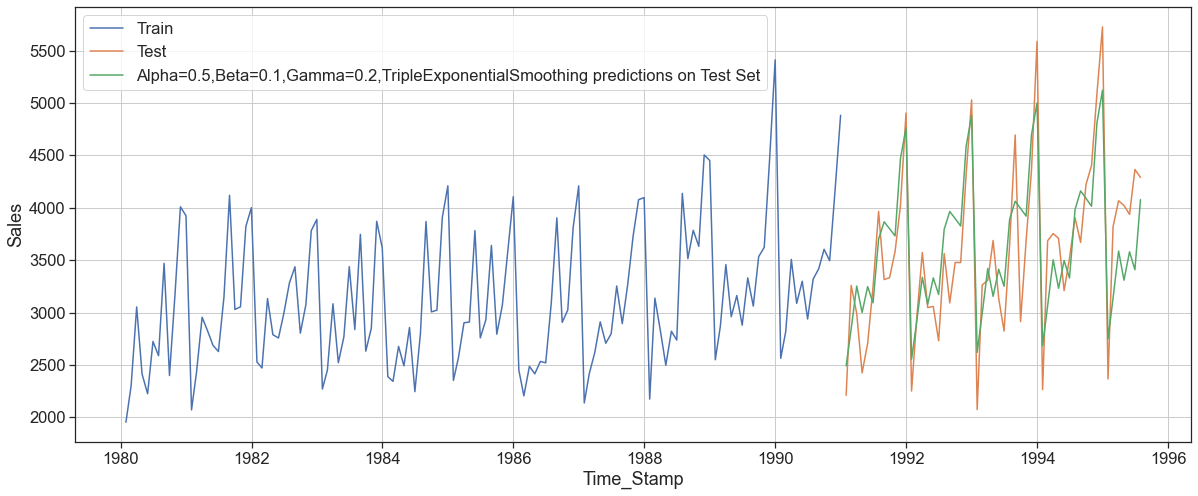

In [85]:
plt.figure(figsize=(20,8))
plt.plot(TES_train['SoftDrinkProduction'],label='Train')
plt.plot(TES_test['SoftDrinkProduction'],label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.5, 0.1, 0.2],label='Alpha=0.5,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')
plt.ylabel("Sales")
plt.xlabel("Time_Stamp")
plt.legend(loc='best')
plt.grid();

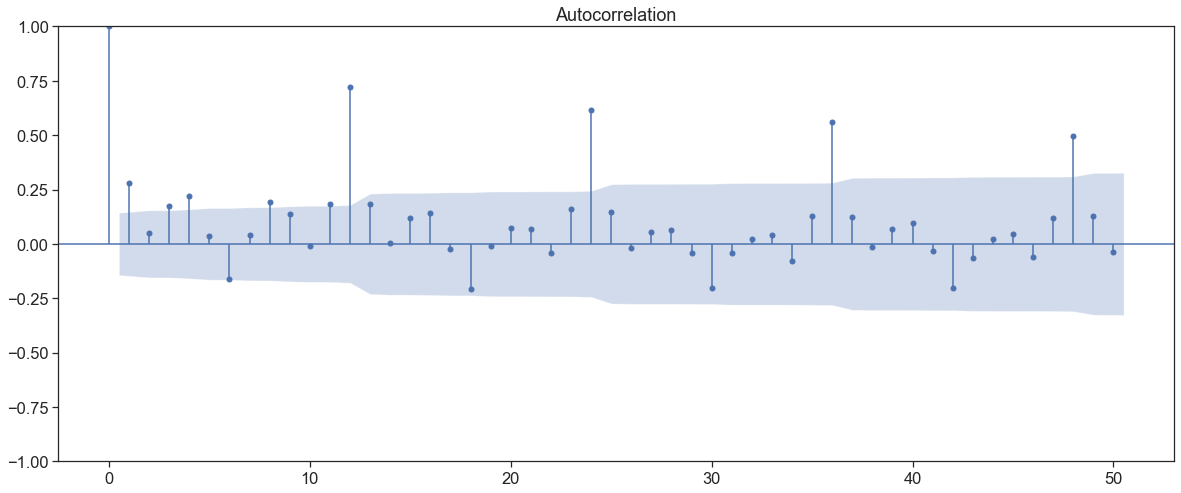

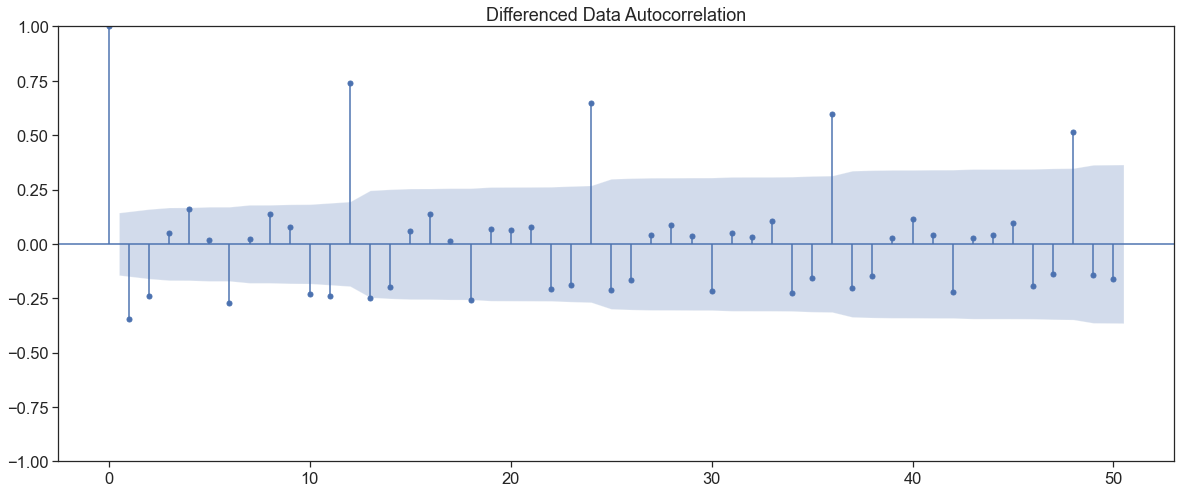

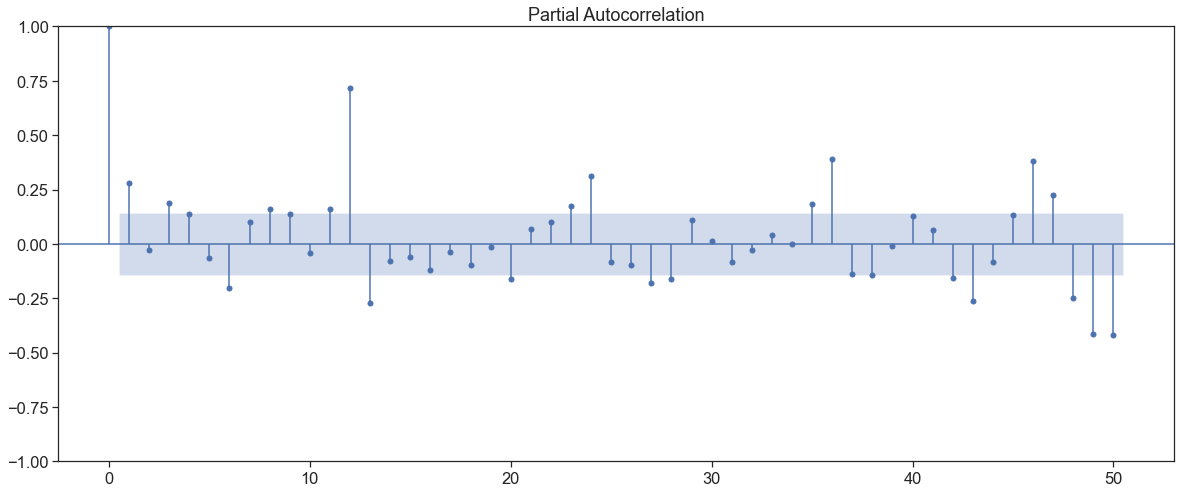

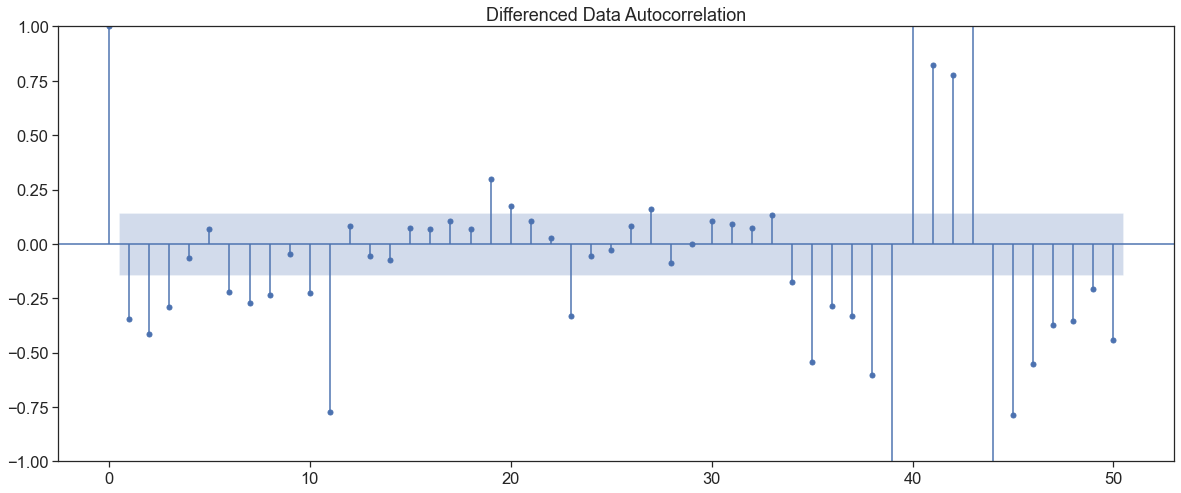

In [86]:
# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.
plot_acf(soft['SoftDrinkProduction'],lags=50)
plot_acf(soft['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(soft['SoftDrinkProduction'],lags=50)
plot_pacf(soft['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [87]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

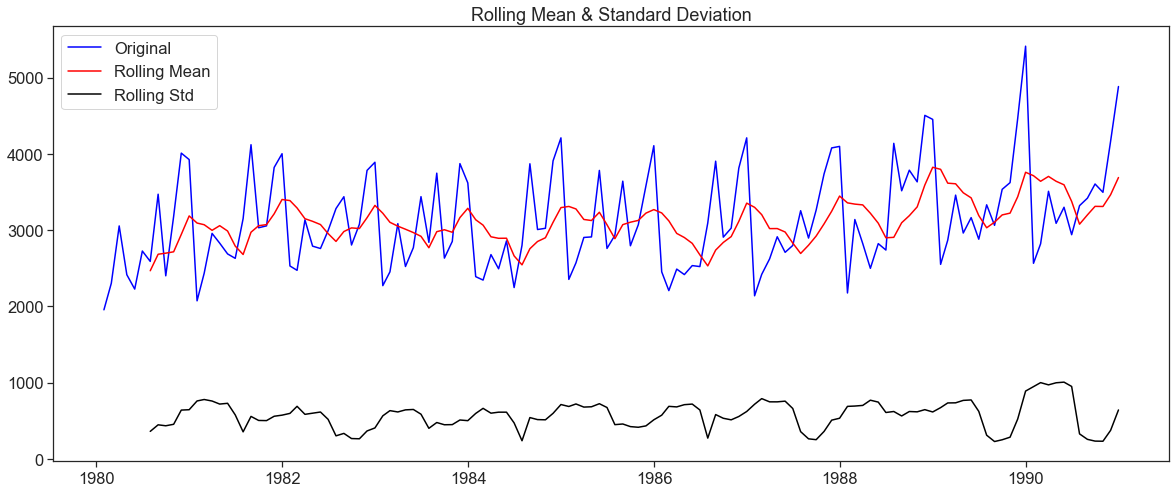

Results of Dickey-Fuller Test:
Test Statistic                  -0.990112
p-value                          0.756854
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [88]:
test_stationarity(train['SoftDrinkProduction'])

In [89]:
(train['SoftDrinkProduction'].diff()).dropna()

Time_Stamp
1980-02-29    348.0
1980-03-31    752.0
1980-04-30   -640.0
1980-05-31   -188.0
1980-06-30    499.0
              ...  
1990-08-31     98.0
1990-09-30    186.0
1990-10-31   -109.0
1990-11-30    668.0
1990-12-31    719.0
Name: SoftDrinkProduction, Length: 131, dtype: float64

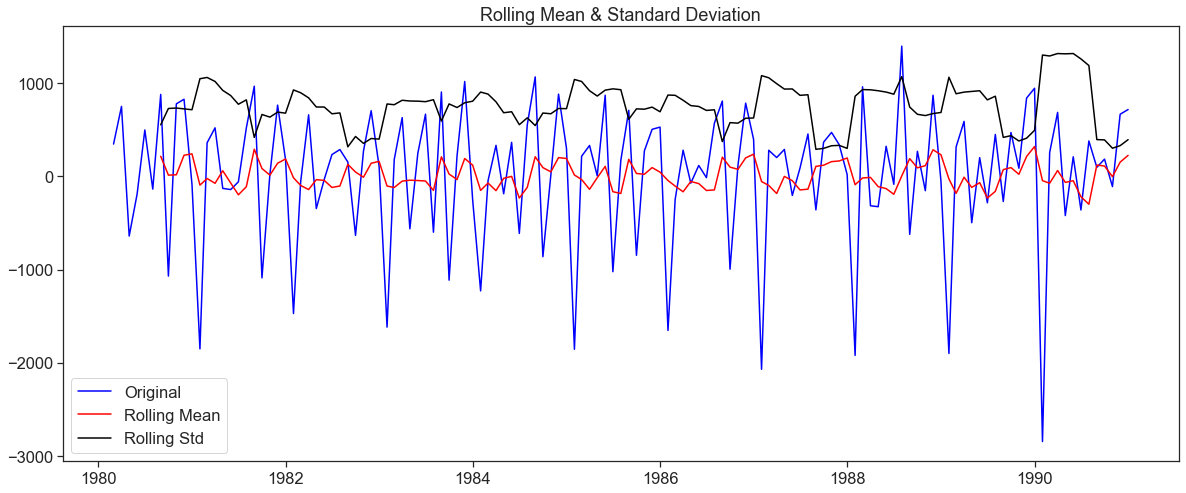

Results of Dickey-Fuller Test:
Test Statistic                -7.299886e+00
p-value                        1.347278e-10
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [90]:
test_stationarity(train['SoftDrinkProduction'].diff().dropna())

In [91]:
#Building ARIMA Model
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [92]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
for param in pdq:
    ARIMA_model = ARIMA(train['SoftDrinkProduction'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.599630211392
ARIMA(0, 1, 2) - AIC:2056.489263243463
ARIMA(0, 1, 3) - AIC:2056.8317894192724
ARIMA(1, 1, 0) - AIC:2097.8721216490417
ARIMA(1, 1, 1) - AIC:2061.5230839350725
ARIMA(1, 1, 2) - AIC:2056.7156820689142
ARIMA(1, 1, 3) - AIC:2058.7121590365814
ARIMA(2, 1, 0) - AIC:2073.2348605360226
ARIMA(2, 1, 1) - AIC:2059.1006718136123
ARIMA(2, 1, 2) - AIC:2058.7127020996977
ARIMA(2, 1, 3) - AIC:2057.0895952227493
ARIMA(3, 1, 0) - AIC:2070.365367141177
ARIMA(3, 1, 1) - AIC:2058.3045462290725
ARIMA(3, 1, 2) - AIC:2060.6799657045794
ARIMA(3, 1, 3) - AIC:2059.5839101344054


In [93]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2   (0, 1, 2)  2056.489263
6   (1, 1, 2)  2056.715682
3   (0, 1, 3)  2056.831789
11  (2, 1, 3)  2057.089595
13  (3, 1, 1)  2058.304546
7   (1, 1, 3)  2058.712159
10  (2, 1, 2)  2058.712702
9   (2, 1, 1)  2059.100672
15  (3, 1, 3)   2059.58391
14  (3, 1, 2)  2060.679966
5   (1, 1, 1)  2061.523084
1   (0, 1, 1)   2069.59963
12  (3, 1, 0)  2070.365367
8   (2, 1, 0)  2073.234861
4   (1, 1, 0)  2097.872122
0   (0, 1, 0)  2103.733834

In [94]:
auto_ARIMA = ARIMA(train['SoftDrinkProduction'], order=(0,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(0, 1, 2)   Log Likelihood               -1025.245
Date:                 Mon, 20 Jun 2022   AIC                           2056.489
Time:                         16:29:53   BIC                           2065.115
Sample:                     01-31-1980   HQIC                          2059.994
                          - 12-31-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5407      0.085     -6.392      0.000      -0.707      -0.375
ma.L2         -0.3913      0.113     -3.475      0.001      -0.612      -0.171
sigma2      3.572e+05   4.62e+04      7.725 

In [95]:
#Predicting Test Data using models
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
predicted_auto_ARIMA.head()

1991-01-31    3931.418221
1991-02-28    3471.550556
1991-03-31    3471.550556
1991-04-30    3471.550556
1991-05-31    3471.550556
Freq: M, Name: predicted_mean, dtype: float64

In [96]:
rmse_a = metrics.mean_squared_error(test['SoftDrinkProduction'],predicted_auto_ARIMA,squared=False)
print(rmse_a)

831.6158526434649


In [97]:
result_soft = pd.DataFrame({'RMSE': [rmse_a]}
                           ,index=['ARIMA(0,1,2) with AIC'])

result_soft

RMSE
ARIMA(0,1,2) with AIC  831.615853

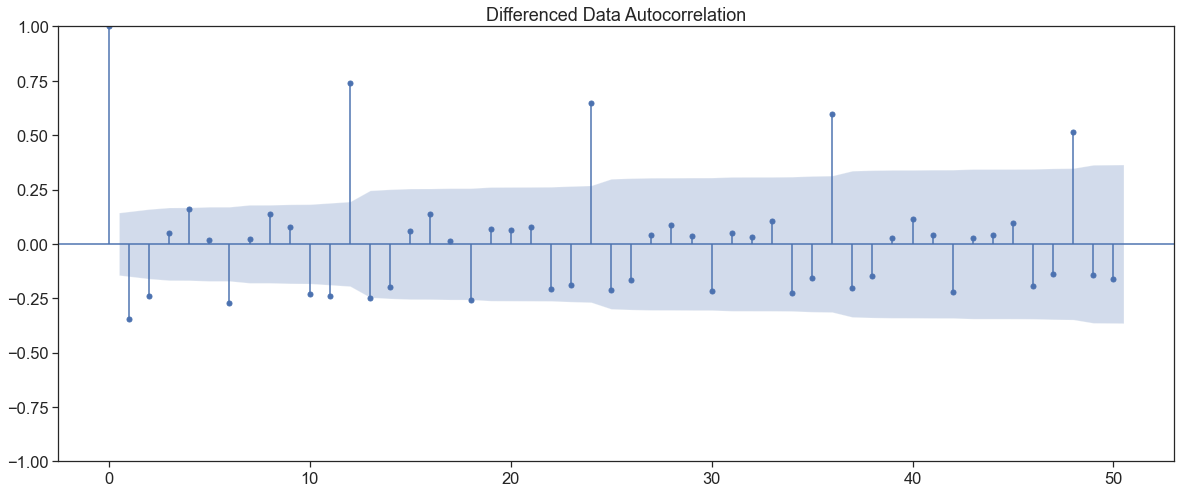

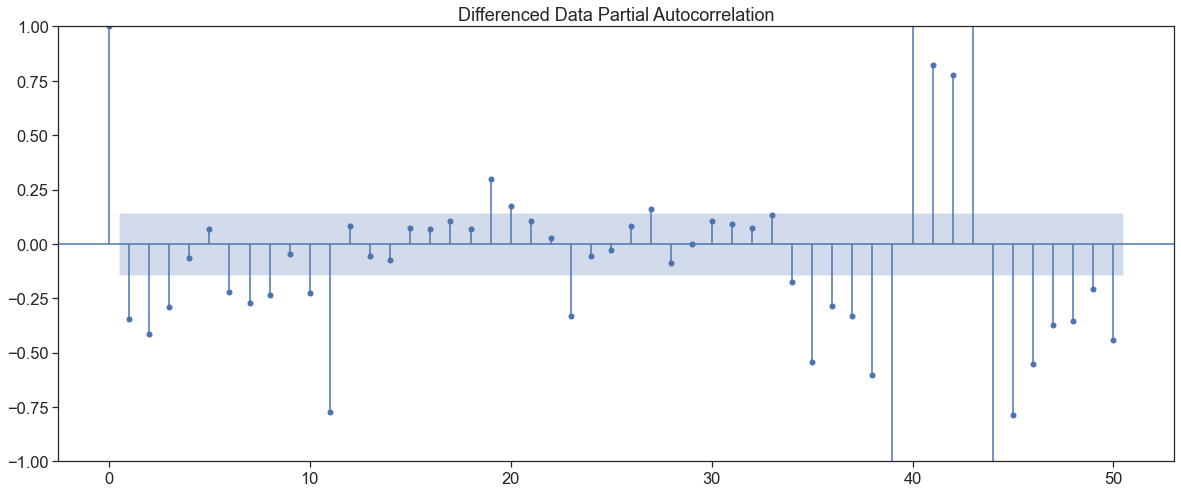

In [98]:
plot_acf(soft['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(soft['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [99]:
manual_ARIMA = ARIMA(train['SoftDrinkProduction'].astype('float64'), order=(3,1,2),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(3, 1, 2)   Log Likelihood               -1024.340
Date:                 Mon, 20 Jun 2022   AIC                           2060.680
Time:                         16:29:55   BIC                           2077.931
Sample:                     01-31-1980   HQIC                          2067.690
                          - 12-31-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3216      0.460     -0.700      0.484      -1.223       0.579
ar.L2         -0.0001      0.189     -0.001      0.999      -0.371       0.370
ar.L3         -0.0227      0.218     -0.104 

In [100]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse_p = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_ARIMA,squared=False)
print(rmse_p)

822.2171813412526


In [101]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_p]},index=['ARIMA(3,1,2) with ACF/PACF'])
result_soft = pd.concat([result_soft,temp_resultsDf])
result_soft

RMSE
ARIMA(0,1,2) with AIC       831.615853
ARIMA(3,1,2) with ACF/PACF  822.217181

In [102]:
p = q = range(0, 4)
P=Q=range(0,4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [103]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic},
                                       ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1991.686591139842
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1835.7619130468124
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1746.6922157437807
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2001.2435317896568
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1938.0559370892734
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1819.7378453342687
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1714.4573257849397
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1790.660005159761
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1790.4200189619764
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1765.5917652678143
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1681.2138650568784
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1704.3326684928627
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1702.201550338569
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1694.5477919273903
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1682.8986376033408
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2035.487178390802
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1932.6082414352395
SARIMA(0, 1, 1)x(0, 0, 2, 6) - A

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1719.363517688814
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1701.2328947636277
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:1620.1096650615168
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1635.6455747892253
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:1633.9930212215843
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1620.0481723418568
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1622.003158410305
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2008.4721966064642
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1908.948612833543
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1763.9211659248767
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1676.0428742964093
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1912.2181766636515
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1846.1807275484991
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1731.9793541728136
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1635.927403158695
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1718.71617274485
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1720.2757187690218
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1689.3722235758482
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC

In [104]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
255  (3, 1, 3)  (3, 0, 3, 6)  1589.761148
59   (0, 1, 3)  (2, 0, 3, 6)  1590.244407
191  (2, 1, 3)  (3, 0, 3, 6)  1590.834461
123  (1, 1, 3)  (2, 0, 3, 6)  1591.284679
63   (0, 1, 3)  (3, 0, 3, 6)  1592.243828

In [105]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -781.881
Date:                           Mon, 20 Jun 2022   AIC                           1589.761
Time:                                   16:34:44   BIC                           1624.749
Sample:                                        0   HQIC                          1603.950
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8579      0.139      6.181      0.000       0.586       1.130
ar.L2         -1.0001      0.103     -9.675

In [106]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [107]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2810.986179  301.821588    2219.426736    3402.545622
1  3145.071569  305.155875    2546.977044    3743.166094
2  3278.737631  307.579779    2675.892341    3881.582921
3  2957.313448  318.542886    2332.980864    3581.646032
4  3330.162704  326.257369    2690.710011    3969.615398

In [108]:
rmse_sp = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse_sp)

428.73019892267274


In [109]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_sp]},index=['SARIMA(3,1,3)(3,0,3,6) with AIC'])
result_soft = pd.concat([result_soft,temp_resultsDf])
result_soft

RMSE
ARIMA(0,1,2) with AIC            831.615853
ARIMA(3,1,2) with ACF/PACF       822.217181
SARIMA(3,1,3)(3,0,3,6) with AIC  428.730199

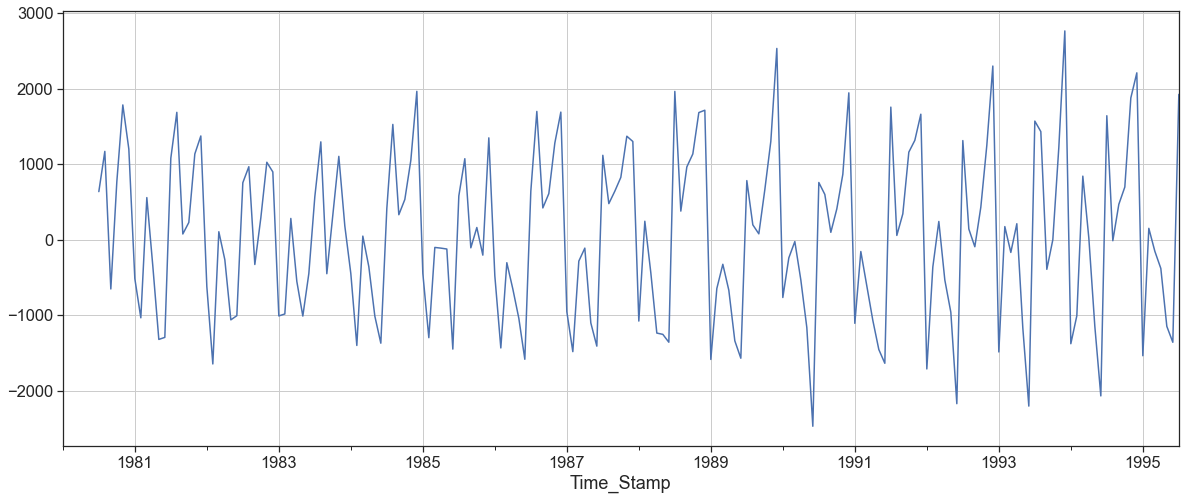

In [110]:
(soft['SoftDrinkProduction'].diff(6)).plot()
plt.grid();

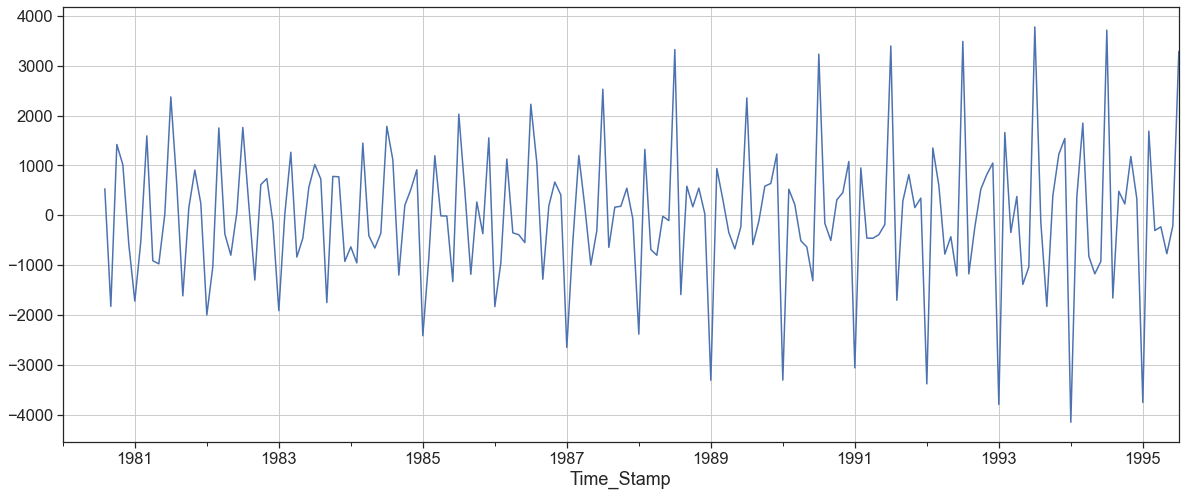

In [111]:
(soft['SoftDrinkProduction'].diff(6)).diff().plot()
plt.grid();

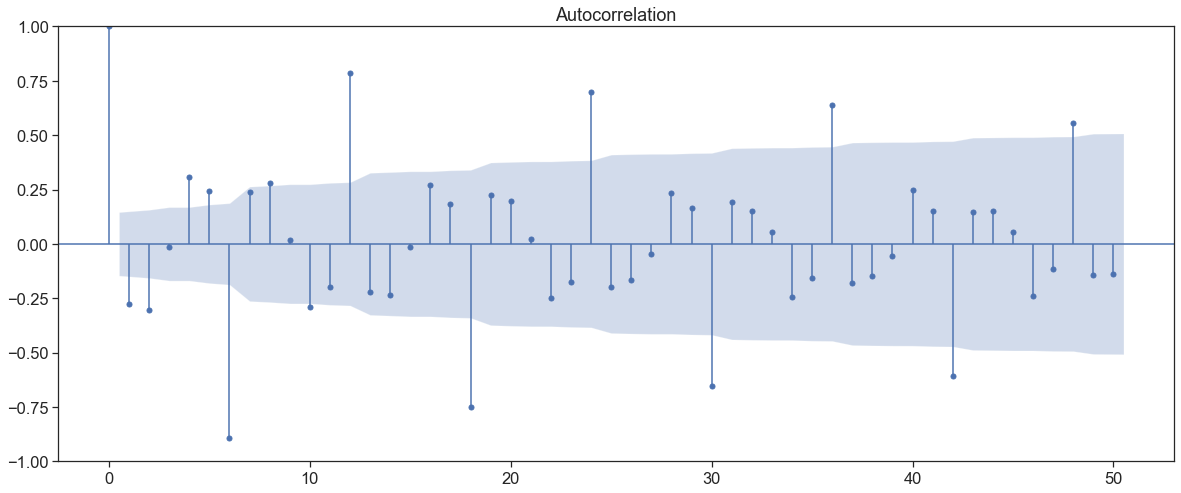

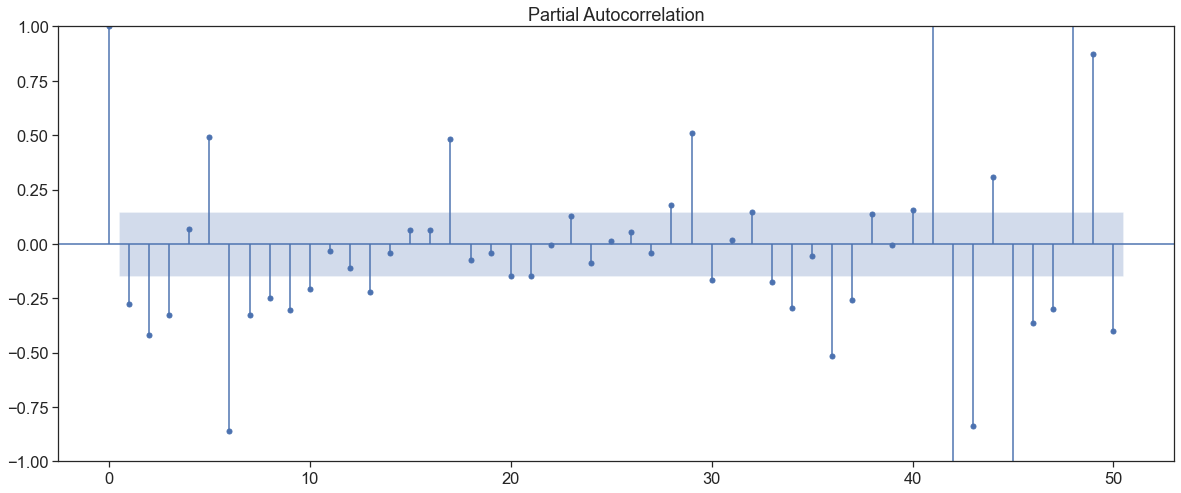

In [112]:
plot_acf((soft['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna(),lags=50)
plot_pacf((soft['SoftDrinkProduction'].diff(6).dropna()).diff(1).dropna(),lags=50);

In [113]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(3,1,3),
                                seasonal_order=(3, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 0, [1, 2], 6)   Log Likelihood                -791.342
Date:                                Mon, 20 Jun 2022   AIC                           1606.683
Time:                                        16:34:50   BIC                           1639.089
Sample:                                             0   HQIC                          1619.827
                                                - 132                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4216      0.144      9.886      0.000       1.140       1.703
ar.

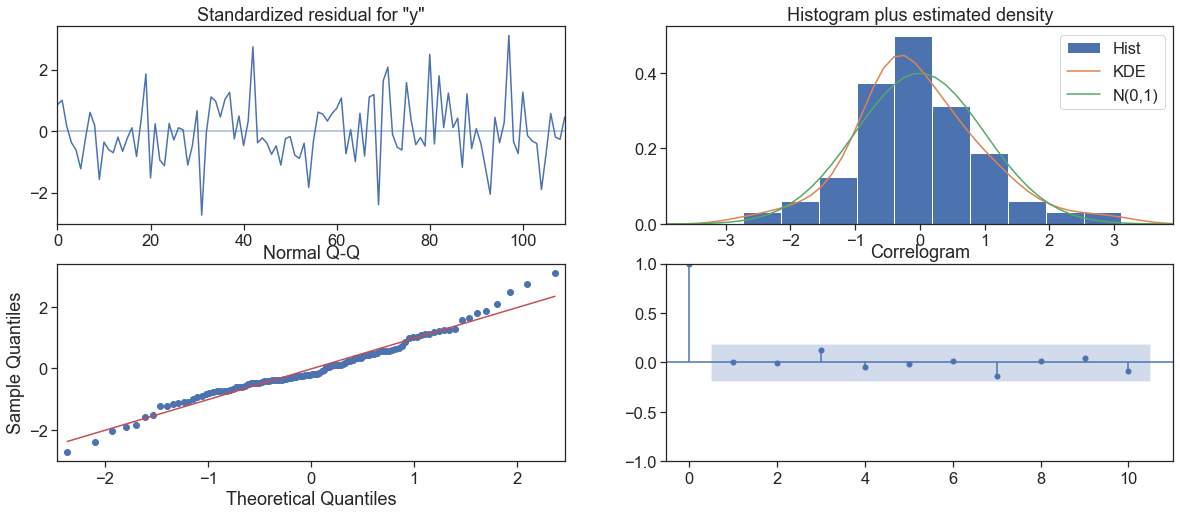

In [114]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [115]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [116]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()
rmse_spm = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_spm)

447.0764800319653


In [117]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_spm]},index=['SARIMA(3,1,3)(3,0,2,6) with ACF/PACF'])
result_soft = pd.concat([result_soft,temp_resultsDf])

result_soft

RMSE
ARIMA(0,1,2) with AIC                 831.615853
ARIMA(3,1,2) with ACF/PACF            822.217181
SARIMA(3,1,3)(3,0,3,6) with AIC       428.730199
SARIMA(3,1,3)(3,0,2,6) with ACF/PACF  447.076480

In [118]:
full_data_model = sm.tsa.statespace.SARIMAX(soft['SoftDrinkProduction'],
                                order=(3,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:               SoftDrinkProduction   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 6)   Log Likelihood               -1191.191
Date:                           Mon, 20 Jun 2022   AIC                           2408.381
Time:                                   16:34:58   BIC                           2448.680
Sample:                               01-31-1980   HQIC                          2424.741
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8210      0.662     -1.240      0.215      -2.119       0.477
ar.L2         -0.1844      0.635     -0.291

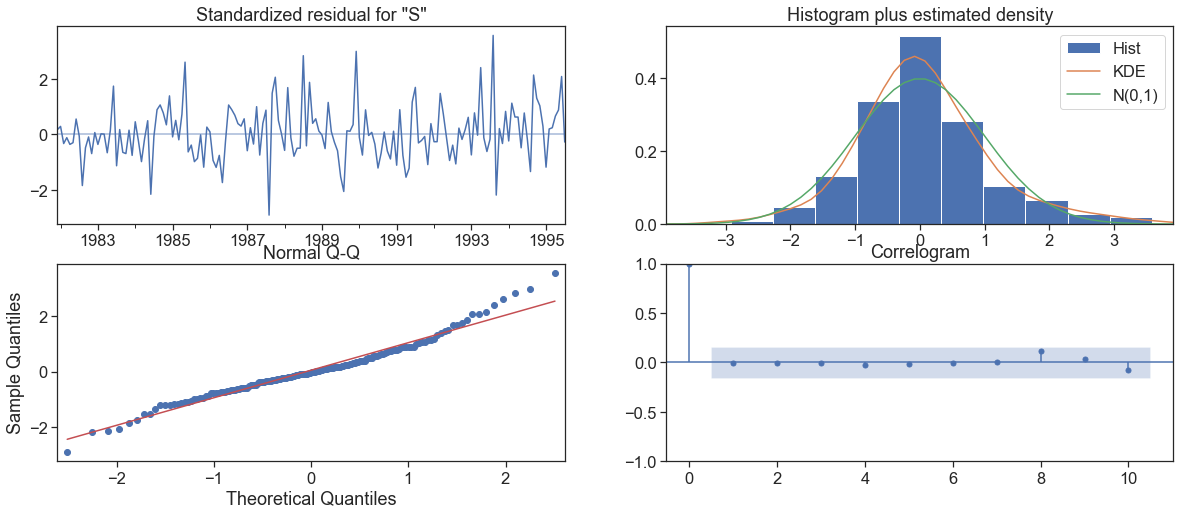

In [119]:
results_full_data_model.plot_diagnostics();

In [120]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [121]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

SoftDrinkProduction         mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31           4332.460637  338.043475    3669.907602    4995.013673
1995-09-30           4222.187115  340.275746    3555.258907    4889.115323
1995-10-31           4517.377945  341.578264    3847.896850    5186.859041
1995-11-30           5245.205114  343.630885    4571.700955    5918.709272
1995-12-31           6018.577149  352.840664    5327.022155    6710.132143

In [122]:
rmse_f = mean_squared_error(soft['SoftDrinkProduction'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_f)

RMSE of the Full Model 446.32199871525427


In [123]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

In [124]:
pred_full_manual_SARIMA_date

SoftDrinkProduction         mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31           4332.460637  338.043475    3669.907602    4995.013673
1995-09-30           4222.187115  340.275746    3555.258907    4889.115323
1995-10-31           4517.377945  341.578264    3847.896850    5186.859041
1995-11-30           5245.205114  343.630885    4571.700955    5918.709272
1995-12-31           6018.577149  352.840664    5327.022155    6710.132143
1996-01-31           2926.654043  355.719519    2229.456598    3623.851489
1996-02-29           4140.816717  357.550467    3440.030679    4841.602755
1996-03-31           4300.515350  360.385091    3594.173552    5006.857149
1996-04-30           4193.284259  365.548329    3476.822700    4909.745819
1996-05-31           4070.263793  368.667017    3347.689718    4792.837869
1996-06-30           4205.018005  372.666035    3474.605998    4935.430013
1996-07-31           4580.702473  375.869228    3844.012324    5317.392622

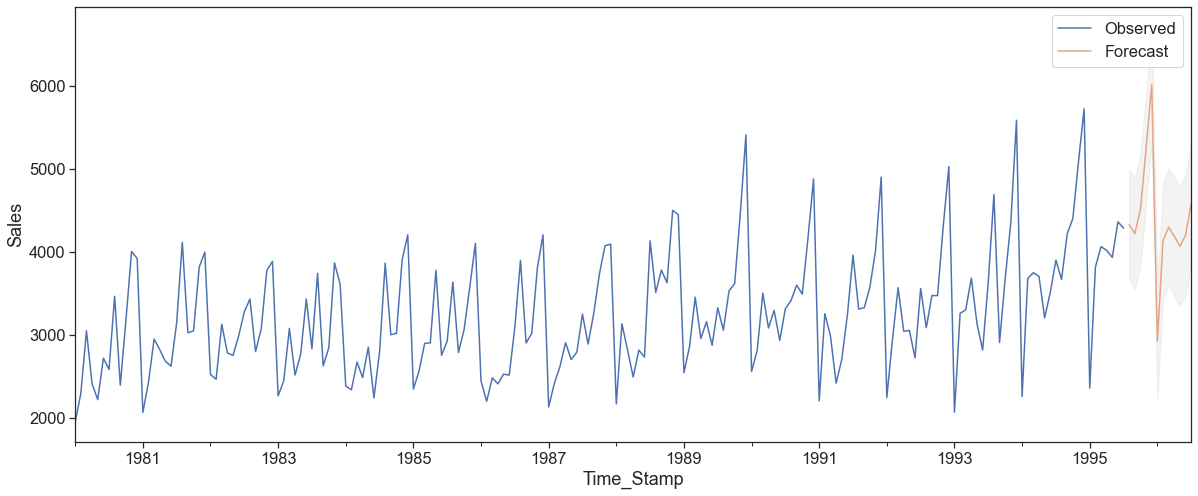

In [125]:
axis = soft['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.05)
axis.set_xlabel('Time_Stamp')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [126]:
result_soft

RMSE
ARIMA(0,1,2) with AIC                 831.615853
ARIMA(3,1,2) with ACF/PACF            822.217181
SARIMA(3,1,3)(3,0,3,6) with AIC       428.730199
SARIMA(3,1,3)(3,0,2,6) with ACF/PACF  447.076480

In [127]:
results1 = pd.DataFrame({'Test RMSE': [rmse_model1_test,rmse_model2_test,rmse_model3_test,rmse_model4_test_2,
                                       rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9,mape_model5_test_1,
                                       resultsDf_6['Test RMSE'][0],resultsDf_7['Test RMSE'][0],
                                      rmse_model8_test_1,resultsDf_8_2f.iloc[0,4],rmse_a,rmse_p,rmse_sp,rmse_spm,rmse_f]},
                       index=['RegressionOnTime','NaiveModel','SimpleAverageModel','2pointTrailingMovingAverage',
                              '4pointTrailingMovingAverage','6pointTrailingMovingAverage','9pointTrailingMovingAverage',
                              'Alpha=0.049,SimpleExponentialSmoothing','Alpha=0.1,SimpleExponentialSmoothing using Brute',
                              'Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing using Brute',
                              'Alpha=0.1,Beta=0.01,Gamma=0.509,TripleExponentialSmoothing',
                              'Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialSmoothing using Brute',
                              'ARIMA(0,1,2) with AIC','ARIMA(3,1,2) with ACF/PACF',
                              'SARIMA(3,1,3)(3,0,3,6) with AIC','SARIMA(3,1,3)(3,0,2,6) with ACF/PACF',
                              'RMSE of the Full Model'
                             ])

In [128]:
results1

Test RMSE
RegressionOnTime                                     775.807810
NaiveModel                                          1065.201355
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.049,SimpleExponentialSmoothing                18.860000
Alpha=0.1,SimpleExponentialSmoothing using Brute     807.346865
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing u...   982.938364
Alpha=0.1,Beta=0.01,Gamma=0.509,TripleExponenti...   447.542908
Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialS...   442.214551
ARIMA(0,1,2) with AIC                                831.615853
ARIMA(3,1,2) with ACF/PACF                           822.217181
SARIMA(3,1,3)(3,0,3,6) with AIC                      428.730199
SARIMA(3,1,3)(3,0,2,6) with ACF/PACF                 447.076480
RMSE of the Full Model                               446.321999